In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re

#### Loading the Dataset.

In [2]:
DF = pd.read_csv('UsedCarsData.csv')

In [3]:
DF.head(50)

,Unnamed: 0,Brand Name,Model Name,Year,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price
0,0,Hyundai I10,Hyundai i10 Magna 1.2 2007,2007,Hatchback,70000,Petrol,First Owner,Delhi,Manual,5,20,102000
1,1,Hyundai I20,Hyundai I20 Sportz 1.4 CRDi 2016,2016,Hatchback,1200,Diesel,First Owner,Bangalore,Manual,5,18.6,704000
2,2,Maruti Suzuki Swift,Maruti Suzuki Swift VDi (O) 2016,2016,Hatchback,79000,Diesel,First Owner,Jodhpur,Manual,5,25.2,630000
3,3,Toyota Etios,Toyota Etios V 2011,2011,Sedan,55000,Petrol,First Owner,mumbai,Manual,5,17.57,310000
4,4,Honda Amaze,Honda Amaze 1.2 V i-VTEC 2019,2019,Sedan,56236,Petrol,First Owner,lucknow,Manual,5,19.5,615000
5,5,Tata Indica Vista,Tata Indica Vista LS Quadrajet 2014,2014,Hatchback,102000,Diesel,Second Owner,Coimbatore,Manual,5,22.3,350000
6,6,Mahindra XUV500,Mahindra XUV500 W6 2014,2014,SUV,29000,Diesel,First Owner,Jaipur,Manual,5,14,677000
7,7,Hyundai I20,Hyundai i20 Sportz 1.4 CRDi 2014,2014,Hatchback,80000,Diesel,Second Owner,jaipur,Manual,5,18.6,340000
8,8,Maruti Suzuki Swift,Maruti Suzuki Swift VXi 2012,2012,Hatchback,68000,Petrol,Second Owner,bangalore,Manual,5,20.4,550000
9,9,Kia Seltos,Kia Seltos HTK Plus 1.5 Petrol 2020,2020,SUV,12000,Petrol,First Owner,Delhi,Manual,5,-,1312000


In [4]:
DF.shape

(7484, 13)

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484 entries, 0 to 7483
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               7484 non-null   int64 
 1   Brand Name               7484 non-null   object
 2   Model Name               7484 non-null   object
 3   Year                     7484 non-null   object
 4   Type                     7484 non-null   object
 5   Total Kilometers Driven  7484 non-null   object
 6   Fuel Type                7484 non-null   object
 7   Owner                    7484 non-null   object
 8   Location                 7484 non-null   object
 9   Transmission             7484 non-null   object
 10  Seating Capacity         7484 non-null   object
 11  Mileage                  7484 non-null   object
 12  Price                    7484 non-null   object
dtypes: int64(1), object(12)
memory usage: 760.2+ KB


### Dataframe Description:

### Problem Statement:

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model.

### FEATURES:
    
Brand Name: Name of the Car Brand

Model Name: Name of the specific Car Model of a Brand

Year:  Year of Manufacture

Type:  Car Model Type

Total Kilometers Driven: Total Kilometers,for which the car has been so far driven.

Fuel Type:  Type of fuel used

Owner: The ordinal number of previous owner

Location: Availability Location of Car       

Transmission:  Power Transmission type of the car   

Seating Capacity: Total number of passengers that the car can accomodate 

Mileage: Mileage of the Car

### Target / Label Column:

Price: Selling Price of the Car

####  Data Cleaning

In [6]:
DF.nunique()

Unnamed: 0                 7484
Brand Name                  223
Model Name                 3527
Year                         30
Type                          9
Total Kilometers Driven    1444
Fuel Type                     8
Owner                        13
Location                    298
Transmission                  9
Seating Capacity             12
Mileage                     314
Price                      1377
dtype: int64

In [7]:
DF['Type'].value_counts()

Hatchback    2863
Sedan        2270
SUV          1613
MUV           453
Crossover     114
Van            75
-              71
5 Seater       18
Pick Up         7
Name: Type, dtype: int64

In [8]:
DF = DF.drop(DF[DF.Type == '5 Seater'].index)

In [9]:
DF = DF.drop(DF[DF.Type == '7 Seater'].index)

In [10]:
DF = DF.drop(DF[DF.Type == '6 Seater'].index)

In [11]:
DF = DF.drop(DF[DF.Type == '8 Seater'].index)

In [12]:
DF = DF.drop(DF[DF.Type == '-'].index)

In [13]:
DF['Type'].value_counts()

Hatchback    2863
Sedan        2270
SUV          1613
MUV           453
Crossover     114
Van            75
Pick Up         7
Name: Type, dtype: int64

In [14]:
DF['Year'].value_counts()

2012       817
2013       738
2014       634
2016       618
2015       607
2011       588
2017       531
2010       488
2018       443
2009       375
2008       355
2019       341
2007       258
2020       215
2021       152
2006       144
2005        24
2003        19
2002        16
2004        14
2000         5
1999         4
1998         2
2001         2
IV-2011      1
1989         1
G2015        1
AT2015       1
1996         1
Name: Year, dtype: int64

In [15]:
DF['Year'] = DF['Year'].replace({'IV-2011':'2011'})

In [16]:
DF['Year'].value_counts()

2012      817
2013      738
2014      634
2016      618
2015      607
2011      589
2017      531
2010      488
2018      443
2009      375
2008      355
2019      341
2007      258
2020      215
2021      152
2006      144
2005       24
2003       19
2002       16
2004       14
2000        5
1999        4
1998        2
2001        2
1989        1
G2015       1
AT2015      1
1996        1
Name: Year, dtype: int64

In [17]:
DF['Brand Name'].value_counts()

Maruti Suzuki Swift Dzire    326
Maruti Suzuki Swift          298
Hyundai I20                  272
Honda City                   262
Hyundai I10                  233
                            ... 
Mitsubishi Outlander           1
Hyundai Sonata Embera          1
Isuzu Mu-x                     1
Fiat Palio                     1
Chevrolet Aveo U Va            1
Name: Brand Name, Length: 222, dtype: int64

In [18]:
DF['Model Name'].value_counts()

Honda City ZX GXi 2007                        25
Maruti Suzuki Swift DZire VDi 2012            24
Maruti Suzuki Ritz VDi 2014                   23
Honda Amaze 1.5 VX i-DTEC 2014                23
Maruti Suzuki Alto LXi 2009                   22
                                              ..
Volkswagen Polo 1.2 TDI Highline 2010          1
Ford EcoSport Trend 1.5 Ti-VCT 2015            1
Maruti Suzuki Swift LDi 2014                   1
Maruti Suzuki S-Cross Alpha 1.3 2018           1
Toyota Innova 2.5 G (Diesel) 7 Seater 2007     1
Name: Model Name, Length: 3523, dtype: int64

In [19]:
DF['Total Kilometers Driven'].value_counts()

65000     185
75000     164
80000     146
70000     145
60000     131
         ... 
250000      1
79058       1
96117       1
98786       1
45127       1
Name: Total Kilometers Driven, Length: 1443, dtype: int64

In [20]:
DF['Fuel Type'].value_counts()

Diesel          3903
Petrol          3415
Petrol + CNG      60
Petrol + LPG      15
Hybrid             2
Name: Fuel Type, dtype: int64

In [21]:
DF['Owner'].value_counts()

First Owner      5242
Second Owner     1726
Third Owner       348
Fourth Owner       68
Fifth Owner         8
Sixth Owner         2
Seventh Owner       1
Name: Owner, dtype: int64

In [22]:
DF['Location'].value_counts()

delhi        896
bangalore    804
kolkata      483
Delhi        446
mumbai       326
            ... 
kochi          1
bhuj           1
mathura        1
Siwan          1
ernakulam      1
Name: Location, Length: 295, dtype: int64

In [23]:
DF['Location'] = DF['Location'].replace({'delhi':'Delhi','bangalore':'Bangalore','bengaluru':'Bangalore','Bengaluru':'Bangalore','patna':'Patna','mumbai':'Mumbai','navi mumbai':'Navi Mumbai','visakhapatnam':'Visakhapatnam','ahmedabad':'Ahmedabad','coimbatore':'Coimbatore','chennai':'Chennai','kolkata':'Kolkata','jaipur':'Jaipur','surat':'Surat','pune':'Pune','hyderabad':'Hyderabad','nagpur':'Nagpur','nashik':'Nashik','gurgaon':'Gurgaon','ghaziabad':'Ghaziabad','faridabad':'Faridabad','lucknow':'Lucknow','jodhpur':'Jodhpur','kanpur':'Kanpur','agra':'Agra','ludhiana':'Ludhiana','sirsa':'Sirsa','noida':'Noida','bhopal':'Bhopal','vadodara':'Vadodara','meerut':'Meerut','thane':'Thane','chandigarh':'Chandigarh','ranchi':'Ranchi','jamshedpur':'Jamshedpur','dehradun':'Dehradun','jalandhar':'Jalandhar','rajkot':'Rajkot','kolhapur':'Kolhapur','aurangabad':'Aurangabad','guwahati':'Guwahati','sangrur':'Sangrur','bathinda':'Bathinda','siliguri':'Siliguri','jabalpur':'Jabalpur','moradabad':'Moradabad','madurai':'Madurai','faizabad':'Faizabad','indore':'Indore','karim nagar':'Karim Nagar','hissar':'Hissar','kota':'Kota','kalyan':'Kalyan','dirba':'Dirba','ahmednagar':'Ahmednagar','panchkula':'Panchkula','mohali':'Mohali','unnao':'Unnao','kathua':'Kathua','raipur':'Raipur','thrissur':'Thrissur','godhara':'Godhara','baraut':'Baraut','ujjain':'Ujjain','amritsar':'Amritsar','shahjahanpur':'Shahjahanpur','srinagar':'Srinagar','patiala':'Patiala','pratapgarh':'Pratapgarh','hoshiarpur':'Hoshiarpur','akola':'Akola','jamnagar':'Jamnagar','jajpur':'Jajpur','palanpur':'Palanpur','solan':'Solan','bhubaneshwar':'Bhubaneshwar','karnal':'Karnal','kanpur nagar':'Kanpur Nagar','jhansi':'Jhansi','mandi':'Mandi','rudrapur':'Rudrapur'})

In [24]:
DF['Location'].value_counts()

Delhi        1342
Bangalore     965
Kolkata       596
Mumbai        388
Ahmedabad     329
             ... 
kochi           1
Panchkula       1
Balrampur       1
Bhilwara        1
patan           1
Name: Location, Length: 244, dtype: int64

In [25]:
DF['Transmission'].value_counts()

Manual                           6512
Automatic                         775
Automated Manual Transmission      95
-                                  13
Name: Transmission, dtype: int64

In [26]:
DF['Seating Capacity'].value_counts()

5     6606
7      630
8       67
4       45
6       37
9        8
-        1
10       1
Name: Seating Capacity, dtype: int64

In [27]:
DF['Mileage'].value_counts()

-        970
26.59    237
18.6     229
20       227
12.8     162
        ... 
7          1
22.05      1
55         1
16.95      1
23.6       1
Name: Mileage, Length: 314, dtype: int64

In [28]:
DF['Mileage'] = DF['Mileage'].replace({'16.10kpl':'16.10','7.6km/l':'7.6'})

In [29]:
DF['Mileage'].value_counts()

-        970
26.59    237
18.6     229
20       227
12.8     162
        ... 
10.72      1
9.5        1
17.06      1
23.4       1
12.5       1
Name: Mileage, Length: 313, dtype: int64

In [30]:
DF['Price'].value_counts()

350000     99
250000     90
360000     90
325000     88
400000     83
           ..
1117000     1
111240      1
752500      1
146841      1
1438570     1
Name: Price, Length: 1374, dtype: int64

#### checking for null values

In [31]:
DF.isnull().sum()

Unnamed: 0                 0
Brand Name                 0
Model Name                 0
Year                       0
Type                       0
Total Kilometers Driven    0
Fuel Type                  0
Owner                      0
Location                   0
Transmission               0
Seating Capacity           0
Mileage                    0
Price                      0
dtype: int64

In [32]:
DF.Location.nunique()

244

#### Checking for blank spaces, random characters in each column

In [33]:
search =["-"]

for c in DF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((DF[c] == s).sum())

- in Unnamed: 0 =  0
- in Brand Name =  0
- in Model Name =  0
- in Year =  0
- in Type =  0
- in Total Kilometers Driven =  0
- in Fuel Type =  0
- in Owner =  0
- in Location =  0
- in Transmission =  13
- in Seating Capacity =  1
- in Mileage =  970
- in Price =  0


'-' in Transmission =  53, '-' in Seating Capacity =  13, and '-' in Mileage =  1148

In [34]:
DF.replace({'-': np.nan}, inplace=True) #converting '-' to NaN values

In [35]:
DF.isnull().sum()

Unnamed: 0                   0
Brand Name                   0
Model Name                   0
Year                         0
Type                         0
Total Kilometers Driven      0
Fuel Type                    0
Owner                        0
Location                     0
Transmission                13
Seating Capacity             1
Mileage                    970
Price                        0
dtype: int64

In [36]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7395 entries, 0 to 7483
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               7395 non-null   int64 
 1   Brand Name               7395 non-null   object
 2   Model Name               7395 non-null   object
 3   Year                     7395 non-null   object
 4   Type                     7395 non-null   object
 5   Total Kilometers Driven  7395 non-null   object
 6   Fuel Type                7395 non-null   object
 7   Owner                    7395 non-null   object
 8   Location                 7395 non-null   object
 9   Transmission             7382 non-null   object
 10  Seating Capacity         7394 non-null   object
 11  Mileage                  6425 non-null   object
 12  Price                    7395 non-null   object
dtypes: int64(1), object(12)
memory usage: 808.8+ KB


Seating Capacity,Mileage,Price,Total Kilometers Driven,Year need to be converted to int64 / float

In [37]:
DF['Mileage'] = DF['Mileage'].replace({'16.10kpl':'16.10','7.6km/l':'7.6','10KM':'10.0','21.79kmp':'21.79'})
DF['Year']=DF['Year'].replace({'G2015':'2015','AT2015':'2015'})

In [38]:
for c in DF[['Seating Capacity','Mileage','Price','Total Kilometers Driven','Year']]:
    DF[c] = DF[c].astype('float','int64')

In [39]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7395 entries, 0 to 7483
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               7395 non-null   int64  
 1   Brand Name               7395 non-null   object 
 2   Model Name               7395 non-null   object 
 3   Year                     7395 non-null   float64
 4   Type                     7395 non-null   object 
 5   Total Kilometers Driven  7395 non-null   float64
 6   Fuel Type                7395 non-null   object 
 7   Owner                    7395 non-null   object 
 8   Location                 7395 non-null   object 
 9   Transmission             7382 non-null   object 
 10  Seating Capacity         7394 non-null   float64
 11  Mileage                  6425 non-null   float64
 12  Price                    7395 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 808.8+ KB


#### Handling Missing Values

In [40]:
DF.isnull().sum()

Unnamed: 0                   0
Brand Name                   0
Model Name                   0
Year                         0
Type                         0
Total Kilometers Driven      0
Fuel Type                    0
Owner                        0
Location                     0
Transmission                13
Seating Capacity             1
Mileage                    970
Price                        0
dtype: int64

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
DF.Transmission.value_counts()

Manual                           6512
Automatic                         775
Automated Manual Transmission      95
Name: Transmission, dtype: int64

#### Imputing most frequently occuring value to missing values.

In [43]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [44]:
si = si.fit(DF[['Transmission']])

In [45]:
DF[['Transmission']] = si.transform(DF[['Transmission']])

In [46]:
DF[['Transmission']].isnull().sum()

Transmission    0
dtype: int64

#### Using KNN Imputation technique for imputing missing data.

In [47]:
from sklearn.impute import KNNImputer

In [48]:
imp = KNNImputer(n_neighbors=2)

In [49]:
DF[['Seating Capacity']] = imp.fit_transform(DF[['Seating Capacity']])

In [50]:
DF[['Mileage']] = imp.fit_transform(DF[['Mileage']])

In [51]:
DF.isnull().sum()

Unnamed: 0                 0
Brand Name                 0
Model Name                 0
Year                       0
Type                       0
Total Kilometers Driven    0
Fuel Type                  0
Owner                      0
Location                   0
Transmission               0
Seating Capacity           0
Mileage                    0
Price                      0
dtype: int64

There are no more null values in Dataset

#### Feature Engineering

In [52]:
DF.reset_index(drop=True,inplace = True)

In [53]:
Brand_Name = DF['Brand Name'].tolist() #creating a list with values from colum 'Brand Name'

In [54]:
Brand_Name

['Hyundai I10',
 'Hyundai I20',
 'Maruti Suzuki Swift',
 'Toyota Etios',
 'Honda Amaze',
 'Tata Indica Vista',
 'Mahindra XUV500',
 'Hyundai I20',
 'Maruti Suzuki Swift',
 'Kia Seltos',
 'Honda CR-V',
 'Ford Figo',
 'Maruti Suzuki Swift Dzire',
 'Maruti Suzuki Swift',
 'Hyundai EON',
 'Volkswagen Vento',
 'Maruti Suzuki Wagon R',
 'Maruti Suzuki Wagon R',
 'Maruti Suzuki Vitara Brezza',
 'Skoda SUPERB',
 'Maruti Suzuki Wagon R',
 'Skoda Rapid',
 'Volkswagen Polo',
 'Hyundai I10',
 'Hyundai I10',
 'Mahindra Scorpio',
 'Chevrolet Beat',
 'Honda City Zx',
 'Renault Duster',
 'Hyundai I10',
 'Maruti Suzuki Baleno',
 'Maruti Suzuki Wagon R',
 'Maruti Suzuki Swift Dzire',
 'Chevrolet Beat',
 'Honda City',
 'Honda City',
 'Mahindra Scorpio',
 'Toyota Corolla Altis',
 'Mahindra Bolero',
 'Honda City',
 'Ford Aspire',
 'Toyota Etios',
 'Maruti Suzuki Swift',
 'Hyundai I10',
 'Hyundai I10',
 'Toyota Innova Crysta',
 'MG Hector',
 'Hyundai Santro Xing',
 'Maruti Suzuki Swift Dzire',
 'Maruti Suzu

In [55]:
Brand = []
for b in Brand_Name:
    Brand.append(b.split(" ",1)[0])

In [56]:
Brand

['Hyundai',
 'Hyundai',
 'Maruti',
 'Toyota',
 'Honda',
 'Tata',
 'Mahindra',
 'Hyundai',
 'Maruti',
 'Kia',
 'Honda',
 'Ford',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Volkswagen',
 'Maruti',
 'Maruti',
 'Maruti',
 'Skoda',
 'Maruti',
 'Skoda',
 'Volkswagen',
 'Hyundai',
 'Hyundai',
 'Mahindra',
 'Chevrolet',
 'Honda',
 'Renault',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Maruti',
 'Chevrolet',
 'Honda',
 'Honda',
 'Mahindra',
 'Toyota',
 'Mahindra',
 'Honda',
 'Ford',
 'Toyota',
 'Maruti',
 'Hyundai',
 'Hyundai',
 'Toyota',
 'MG',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Mahindra',
 'Volkswagen',
 'Renault',
 'Hyundai',
 'Skoda',
 'Mahindra',
 'Datsun',
 'Maruti',
 'Ford',
 'Honda',
 'Maruti',
 'Maruti',
 'Tata',
 'Toyota',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Hyundai',
 'Volkswagen',
 'Maruti',
 'Maruti',
 'Honda',
 'Ford',
 'Hyundai',
 'Ford',
 'Honda',
 'Hyundai',
 'Mahindra',
 'Hyundai',
 'Tata',
 'Maruti',
 'Maruti',
 'Toyota',
 'Mahindra',
 'Mahindra',
 'Mahindra',
 'Tata

In [57]:
Model = []
for b in Brand_Name:
    Model.append(b.split(" ",1)[1])

In [58]:
Model

['I10',
 'I20',
 'Suzuki Swift',
 'Etios',
 'Amaze',
 'Indica Vista',
 'XUV500',
 'I20',
 'Suzuki Swift',
 'Seltos',
 'CR-V',
 'Figo',
 'Suzuki Swift Dzire',
 'Suzuki Swift',
 'EON',
 'Vento',
 'Suzuki Wagon R',
 'Suzuki Wagon R',
 'Suzuki Vitara Brezza',
 'SUPERB',
 'Suzuki Wagon R',
 'Rapid',
 'Polo',
 'I10',
 'I10',
 'Scorpio',
 'Beat',
 'City Zx',
 'Duster',
 'I10',
 'Suzuki Baleno',
 'Suzuki Wagon R',
 'Suzuki Swift Dzire',
 'Beat',
 'City',
 'City',
 'Scorpio',
 'Corolla Altis',
 'Bolero',
 'City',
 'Aspire',
 'Etios',
 'Suzuki Swift',
 'I10',
 'I10',
 'Innova Crysta',
 'Hector',
 'Santro Xing',
 'Suzuki Swift Dzire',
 'Suzuki Swift',
 'Xcent',
 'Suzuki Baleno',
 'Ssangyong Rexton',
 'Cross Polo',
 'Duster',
 'I20',
 'Octavia',
 'XUV500',
 'Redi-GO',
 'Suzuki Eeco',
 'Figo',
 'City',
 'Suzuki Swift',
 'Suzuki Baleno',
 'Safari Storme',
 'Innova Crysta',
 'Suzuki Zen',
 'Getz Prime',
 'Suzuki Ritz',
 'Santro Xing',
 'Vento',
 'Suzuki Celerio',
 'Suzuki Ertiga',
 'Mobilio',
 'EcoSp

In [59]:
Model_Name = DF['Model Name'].tolist() #creating a list with values from colum 'Model Name'

In [60]:
Model_Name

['Hyundai i10 Magna 1.2 2007',
 'Hyundai I20 Sportz 1.4 CRDi 2016',
 'Maruti Suzuki Swift VDi (O) 2016',
 'Toyota Etios V 2011',
 'Honda Amaze 1.2 V i-VTEC 2019',
 'Tata Indica Vista LS Quadrajet 2014',
 'Mahindra XUV500 W6 2014',
 'Hyundai i20 Sportz 1.4 CRDi 2014',
 'Maruti Suzuki Swift VXi 2012',
 'Kia Seltos HTK Plus 1.5 Petrol 2020',
 'Honda CR-V 2.4 MT 2008',
 'Ford Figo DURATEC TITANIUM 1.2 2014',
 'Maruti Suzuki Swift DZire VDi 2008',
 'Maruti Suzuki Swift LXi 2018',
 'Hyundai Eon Magna 2011',
 'Volkswagen Vento Comfortline Diesel 2012',
 'Maruti Suzuki Wagon R LXi CNG (O) 2017',
 'Maruti Suzuki Wagon R LXi 2014',
 'Maruti Suzuki Vitara Brezza ZDi 2019',
 'Skoda Superb ELEGANCE 2.0 TDI CR AT 2009',
 'Maruti Suzuki Wagon R LXi 2007',
 'Skoda Rapid 1.6 MPI Elegance 2013',
 'Volkswagen Polo Comfortline 1.2L (P) 2011',
 'Hyundai i10 Magna 1.2 Kappa2 2009',
 'Hyundai i10 Era 2010',
 'Mahindra Scorpio S10 2015',
 'Chevrolet Beat LS Petrol 2010',
 'Honda City ZX GXi 2008',
 'Renault D

In [61]:
Variant1 = []
for m in Model_Name:
    Variant1.append(m.split(" ",2)[2])

In [62]:
Variant1

['Magna 1.2 2007',
 'Sportz 1.4 CRDi 2016',
 'Swift VDi (O) 2016',
 'V 2011',
 '1.2 V i-VTEC 2019',
 'Vista LS Quadrajet 2014',
 'W6 2014',
 'Sportz 1.4 CRDi 2014',
 'Swift VXi 2012',
 'HTK Plus 1.5 Petrol 2020',
 '2.4 MT 2008',
 'DURATEC TITANIUM 1.2 2014',
 'Swift DZire VDi 2008',
 'Swift LXi 2018',
 'Magna 2011',
 'Comfortline Diesel 2012',
 'Wagon R LXi CNG (O) 2017',
 'Wagon R LXi 2014',
 'Vitara Brezza ZDi 2019',
 'ELEGANCE 2.0 TDI CR AT 2009',
 'Wagon R LXi 2007',
 '1.6 MPI Elegance 2013',
 'Comfortline 1.2L (P) 2011',
 'Magna 1.2 Kappa2 2009',
 'Era 2010',
 'S10 2015',
 'LS Petrol 2010',
 'ZX GXi 2008',
 '110 PS RXZ 2013',
 '1.1L iRDE Era Special Edition 2010',
 'Baleno Alpha 1.2 2019',
 'Wagon R VXi 2017',
 'Swift DZire VXi 2010',
 'LT Petrol 2010',
 'V MT DIESEL 2015',
 '1.5 S AT 2009',
 'VLX 2WD 2011',
 'Altis G MT 2010',
 'Power Plus SLE 2017',
 'SV CVT i-VTEC 2014',
 'Trend 1.2 Ti-VCT 2016',
 'VD 2016',
 'Swift VDi 2018',
 'Magna 1.2 2009',
 'Era 2008',
 'Crysta 2.8 ZX AT 

In [63]:
Variant = []
for v in Variant1:
    Variant.append(v.rsplit(" ",1)[0]) #removing manufacture year from the variant names

In [64]:
Variant

['Magna 1.2',
 'Sportz 1.4 CRDi',
 'Swift VDi (O)',
 'V',
 '1.2 V i-VTEC',
 'Vista LS Quadrajet',
 'W6',
 'Sportz 1.4 CRDi',
 'Swift VXi',
 'HTK Plus 1.5 Petrol',
 '2.4 MT',
 'DURATEC TITANIUM 1.2',
 'Swift DZire VDi',
 'Swift LXi',
 'Magna',
 'Comfortline Diesel',
 'Wagon R LXi CNG (O)',
 'Wagon R LXi',
 'Vitara Brezza ZDi',
 'ELEGANCE 2.0 TDI CR AT',
 'Wagon R LXi',
 '1.6 MPI Elegance',
 'Comfortline 1.2L (P)',
 'Magna 1.2 Kappa2',
 'Era',
 'S10',
 'LS Petrol',
 'ZX GXi',
 '110 PS RXZ',
 '1.1L iRDE Era Special Edition',
 'Baleno Alpha 1.2',
 'Wagon R VXi',
 'Swift DZire VXi',
 'LT Petrol',
 'V MT DIESEL',
 '1.5 S AT',
 'VLX 2WD',
 'Altis G MT',
 'Power Plus SLE',
 'SV CVT i-VTEC',
 'Trend 1.2 Ti-VCT',
 'VD',
 'Swift VDi',
 'Magna 1.2',
 'Era',
 'Crysta 2.8 ZX AT 7 STR',
 'Sharp 1.5 DCT Petrol',
 'Xing GLS',
 'Swift DZire VDi',
 'Swift VXi',
 'S 1.1 CRDi',
 'Baleno Sigma 1.2',
 'Rexton RX7',
 'Polo 1.5 TDI',
 '110 PS RXZ 4X2 MT',
 'Sportz 1.4 CRDi',
 'AMBIENTE 1.8 TURBO',
 'W6',
 'S',

##### Adding 'Brand', 'Model' and 'Variant' columns to DF dataframe.

In [65]:
df2 = pd.DataFrame({'Brand':Brand, 'Model':Model,'Variant': Variant})

In [66]:
df2

,Brand,Model,Variant
0,Hyundai,I10,Magna 1.2
1,Hyundai,I20,Sportz 1.4 CRDi
2,Maruti,Suzuki Swift,Swift VDi (O)
3,Toyota,Etios,V
4,Honda,Amaze,1.2 V i-VTEC
...,...,...,...
7390,Volkswagen,Vento,1.6L Highline
7391,Toyota,Corolla Altis,Altis 1.8 G
7392,Icml,Rhino Rx,Rx ROYALE CRDFI 8 STR BS IV
7393,Honda,Civic,1.8 S MT


In [67]:
df2.index = DF.index

In [68]:
DF[['Brand','Model','Variant']] = df2[['Brand','Model','Variant']]

In [69]:
DF

,Unnamed: 0,Brand Name,Model Name,Year,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price,Brand,Model,Variant
0,0,Hyundai I10,Hyundai i10 Magna 1.2 2007,2007.0,Hatchback,70000.0,Petrol,First Owner,Delhi,Manual,5.0,20.000000,102000.0,Hyundai,I10,Magna 1.2
1,1,Hyundai I20,Hyundai I20 Sportz 1.4 CRDi 2016,2016.0,Hatchback,1200.0,Diesel,First Owner,Bangalore,Manual,5.0,18.600000,704000.0,Hyundai,I20,Sportz 1.4 CRDi
2,2,Maruti Suzuki Swift,Maruti Suzuki Swift VDi (O) 2016,2016.0,Hatchback,79000.0,Diesel,First Owner,Jodhpur,Manual,5.0,25.200000,630000.0,Maruti,Suzuki Swift,Swift VDi (O)
3,3,Toyota Etios,Toyota Etios V 2011,2011.0,Sedan,55000.0,Petrol,First Owner,Mumbai,Manual,5.0,17.570000,310000.0,Toyota,Etios,V
4,4,Honda Amaze,Honda Amaze 1.2 V i-VTEC 2019,2019.0,Sedan,56236.0,Petrol,First Owner,Lucknow,Manual,5.0,19.500000,615000.0,Honda,Amaze,1.2 V i-VTEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,7479,Volkswagen Vento,Volkswagen Vento 1.6L Highline 2011,2011.0,Sedan,59123.0,Petrol,First Owner,bhatinda,Manual,5.0,19.044308,380000.0,Volkswagen,Vento,1.6L Highline
7391,7480,Toyota Corolla Altis,Toyota Corolla Altis 1.8 G 2015,2015.0,Sedan,35000.0,Petrol,First Owner,Delhi,Manual,5.0,15.230000,900000.0,Toyota,Corolla Altis,Altis 1.8 G
7392,7481,Icml Rhino Rx,ICML Rhino Rx ROYALE CRDFI 8 STR BS IV 2008,2008.0,SUV,124758.0,Diesel,Fourth Owner,Calicut,Manual,5.0,11.120000,79999.0,Icml,Rhino Rx,Rx ROYALE CRDFI 8 STR BS IV
7393,7482,Honda Civic,Honda Civic 1.8 S MT 2006,2006.0,Sedan,121025.0,Petrol,First Owner,Bangalore,Manual,5.0,14.800000,250000.0,Honda,Civic,1.8 S MT


In [70]:
DF.Brand.value_counts()

Maruti        1847
Hyundai       1542
Honda          713
Toyota         610
Mahindra       607
Ford           412
Tata           313
Volkswagen     311
Renault        239
Chevrolet      228
Skoda          226
Nissan         132
Fiat            64
MG              45
Kia             38
Datsun          32
Mitsubishi      17
Icml            11
Opel             2
Force            2
Isuzu            2
Premier          1
Volvo            1
Name: Brand, dtype: int64

In [71]:
DF.Brand.nunique()

23

In [72]:
DF.Model.nunique()

222

In [73]:
DF.Model.value_counts()

Suzuki Swift Dzire    326
Suzuki Swift          298
I20                   272
City                  262
I10                   233
                     ... 
Indigocs                1
Sonata Embera           1
Gurkha                  1
Terracan                1
Indica V2 Xeta          1
Name: Model, Length: 222, dtype: int64

In [74]:
DF.Variant.value_counts()

Swift DZire VDi         129
Swift VDi                87
Magna 1.2                81
Swift VXi                77
Alto LXi                 67
                       ... 
4X4 EX DICOR 2.2 VTT      1
Dynamic 1.2               1
1.5 DV5 MT Ambiente       1
3.0 Limited Edition       1
eCS VX CR4                1
Name: Variant, Length: 1617, dtype: int64

In [75]:
DF.Variant.nunique()

1617

#### Dropping columns Unnamed: 0, Brand Name and Model Name since they are no longer required

In [76]:
DF.drop(columns = ['Unnamed: 0','Brand Name','Model Name'],inplace=True)

### Getting statistical information of the data.

In [77]:
DF.describe()

,Year,Total Kilometers Driven,Seating Capacity,Mileage,Price
count,7395.000000,7395.000000,7395.000000,7395.000000,7.395000e+03
mean,2013.354564,63729.507505,5.201515,19.044308,5.440426e+05
std,3.827748,43164.879388,0.643074,4.274335,5.063147e+05
min,1989.000000,100.000000,4.000000,7.000000,6.290000e+02
25%,2011.000000,42000.000000,5.000000,16.470000,2.730000e+05
50%,2013.000000,62500.000000,5.000000,19.044308,4.110000e+05
75%,2016.000000,80000.000000,5.000000,21.400000,6.400000e+05
max,2021.000000,1000000.000000,10.000000,55.000000,5.000000e+06


Big difference between max and 75% in Seating Capacity column indicates presence of outliers.

In [78]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the object type Columns

Type            object
Fuel Type       object
Owner           object
Location        object
Transmission    object
Brand           object
Model           object
Variant         object
dtype: object

In [79]:
DF.dtypes[DF.dtypes != 'object'] #Identifying the non object type Columns

Year                       float64
Total Kilometers Driven    float64
Seating Capacity           float64
Mileage                    float64
Price                      float64
dtype: object

### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing the Target Column

<AxesSubplot:xlabel='Price', ylabel='Density'>

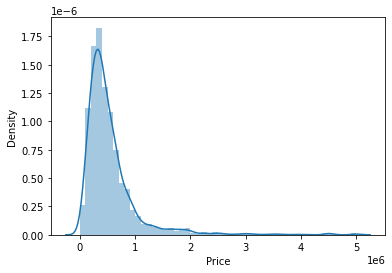

In [80]:
sns.distplot(DF.Price)

From the graph above it is observed that the Price data forms a continuous distribution and the distribution is skewed.

In [81]:
DF.Price.describe()

count    7.395000e+03
mean     5.440426e+05
std      5.063147e+05
min      6.290000e+02
25%      2.730000e+05
50%      4.110000e+05
75%      6.400000e+05
max      5.000000e+06
Name: Price, dtype: float64

In [82]:
DF.Price.skew()

3.9654782942470206

#### Analyzing the Feature Columns

In [83]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the Categorical Columns

Type            object
Fuel Type       object
Owner           object
Location        object
Transmission    object
Brand           object
Model           object
Variant         object
dtype: object

In [84]:
DF.Type.value_counts()

Hatchback    2863
Sedan        2270
SUV          1613
MUV           453
Crossover     114
Van            75
Pick Up         7
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

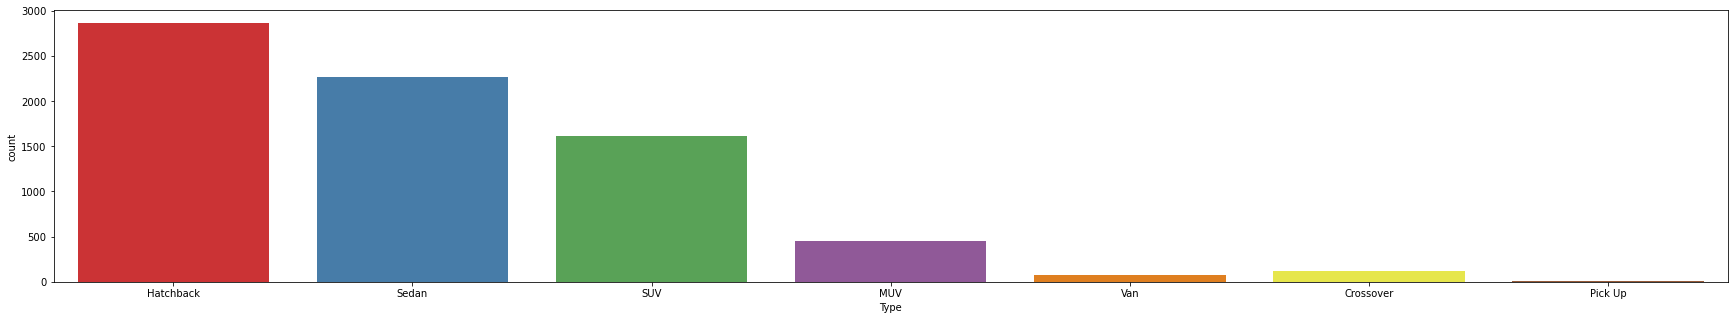

In [85]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(DF.Type, palette="Set1")

In [86]:
DF['Fuel Type'].value_counts()

Diesel          3903
Petrol          3415
Petrol + CNG      60
Petrol + LPG      15
Hybrid             2
Name: Fuel Type, dtype: int64

<AxesSubplot:xlabel='Fuel Type', ylabel='count'>

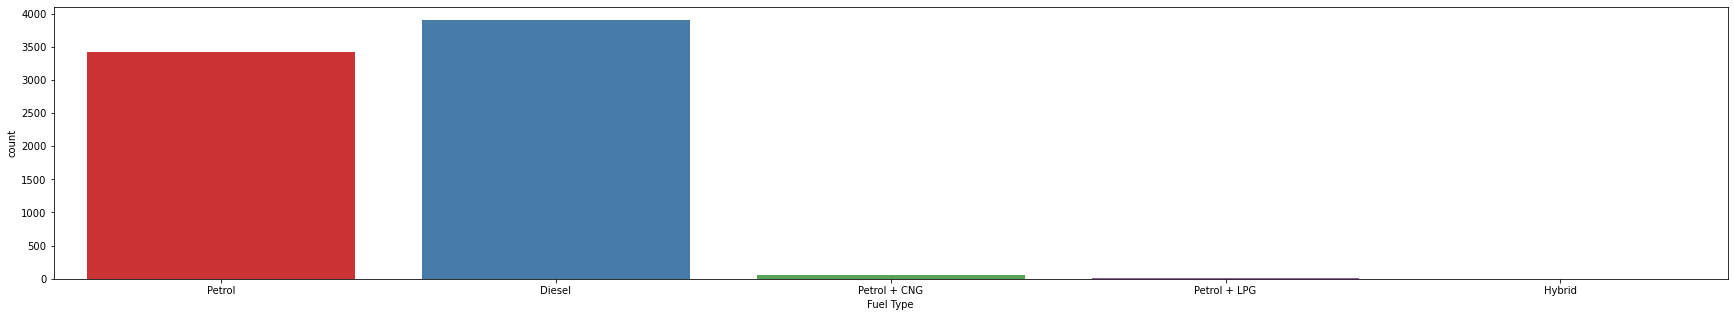

In [87]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(DF['Fuel Type'], palette="Set1")

In [88]:
DF['Owner'].value_counts()

First Owner      5242
Second Owner     1726
Third Owner       348
Fourth Owner       68
Fifth Owner         8
Sixth Owner         2
Seventh Owner       1
Name: Owner, dtype: int64

<AxesSubplot:xlabel='Owner', ylabel='count'>

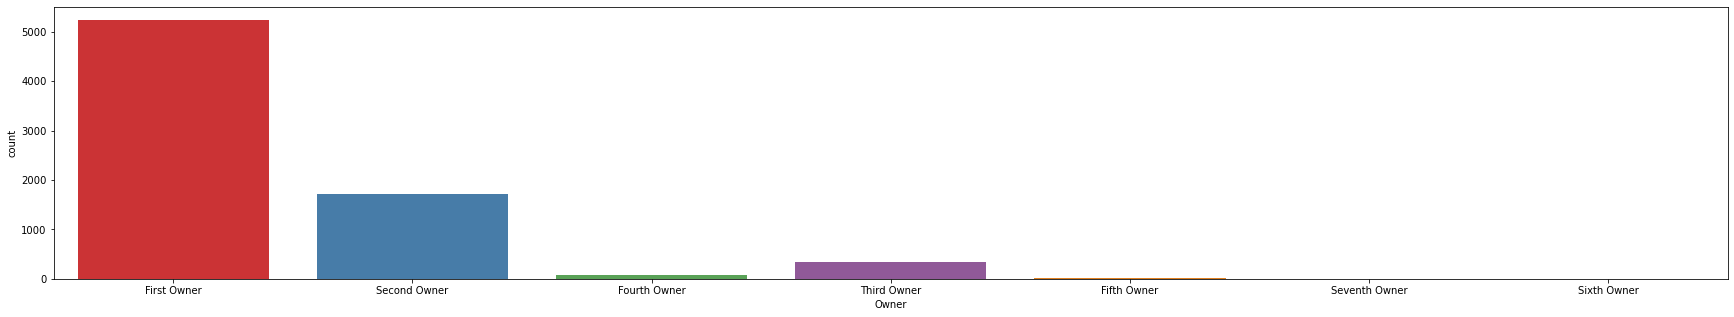

In [89]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(DF['Owner'], palette="Set1")

In [90]:
DF['Location'].value_counts()

Delhi        1342
Bangalore     965
Kolkata       596
Mumbai        388
Ahmedabad     329
             ... 
kochi           1
Panchkula       1
Balrampur       1
Bhilwara        1
patan           1
Name: Location, Length: 244, dtype: int64

<AxesSubplot:xlabel='Location', ylabel='count'>

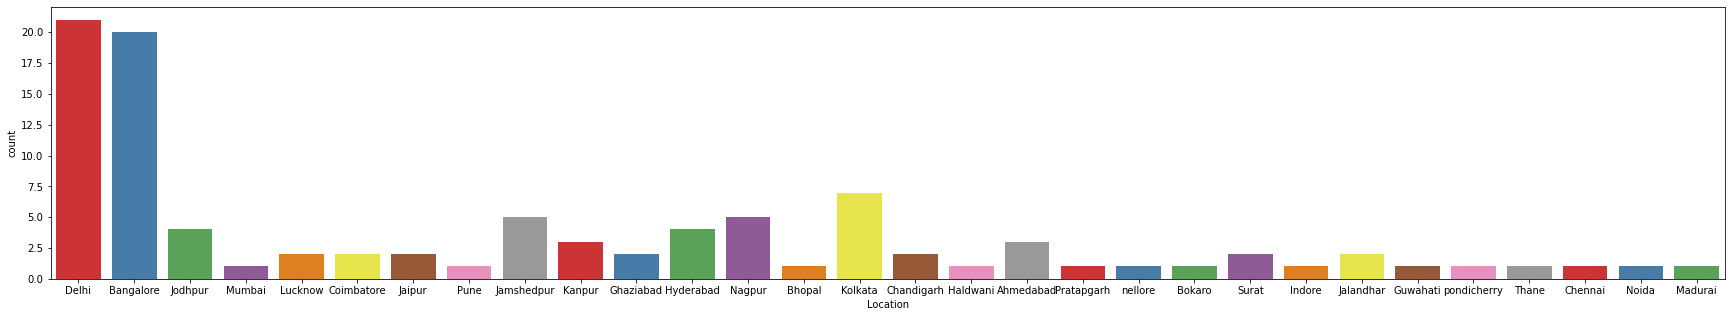

In [91]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(DF['Location'][0:100], palette="Set1")

In [92]:
DF['Transmission'].value_counts()

Manual                           6525
Automatic                         775
Automated Manual Transmission      95
Name: Transmission, dtype: int64

<AxesSubplot:xlabel='Transmission', ylabel='count'>

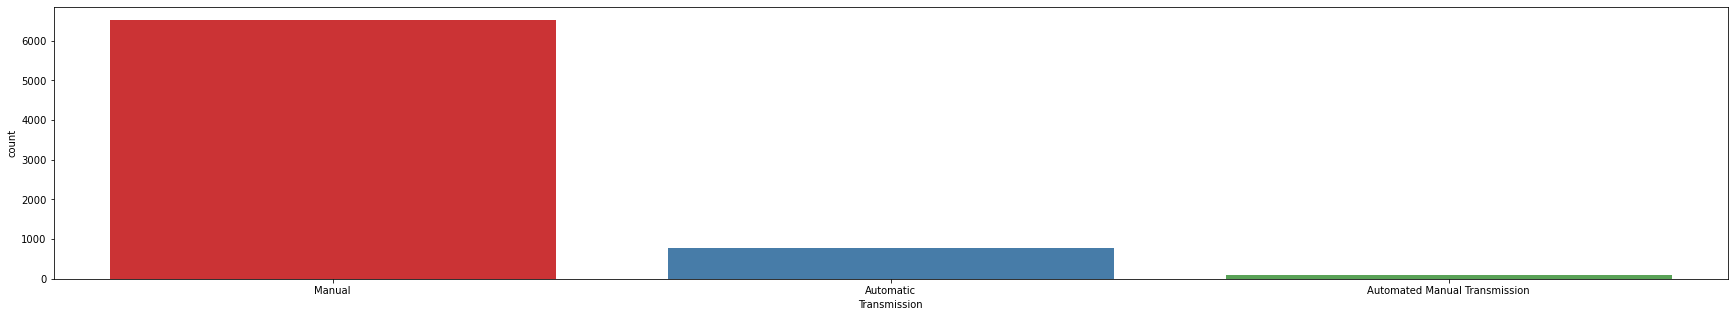

In [93]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(DF['Transmission'], palette="Set1")

In [94]:
DF['Brand'].value_counts()

Maruti        1847
Hyundai       1542
Honda          713
Toyota         610
Mahindra       607
Ford           412
Tata           313
Volkswagen     311
Renault        239
Chevrolet      228
Skoda          226
Nissan         132
Fiat            64
MG              45
Kia             38
Datsun          32
Mitsubishi      17
Icml            11
Opel             2
Force            2
Isuzu            2
Premier          1
Volvo            1
Name: Brand, dtype: int64

<AxesSubplot:xlabel='Brand', ylabel='count'>

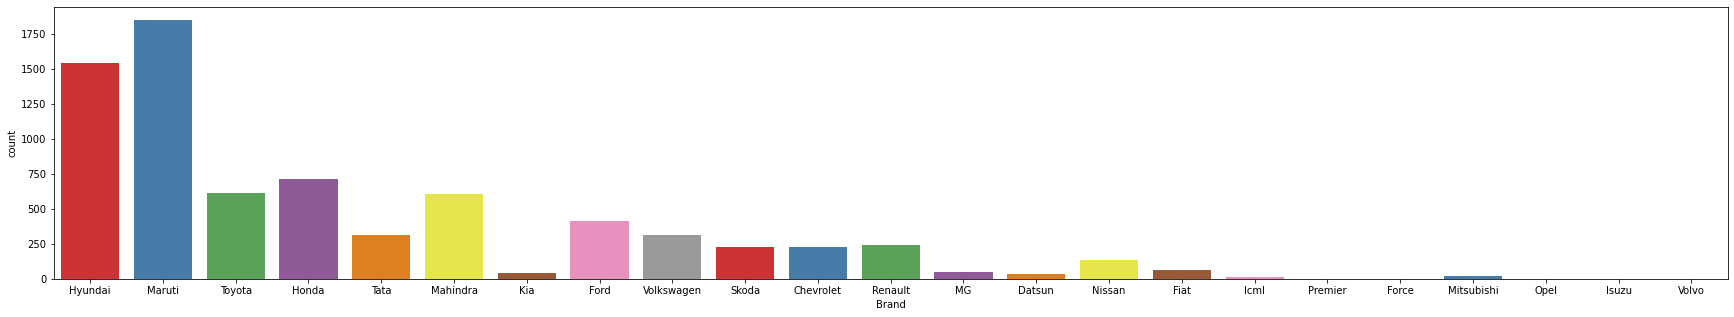

In [95]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(DF['Brand'], palette="Set1")

In [96]:
DF['Model'].value_counts()

Suzuki Swift Dzire    326
Suzuki Swift          298
I20                   272
City                  262
I10                   233
                     ... 
Indigocs                1
Sonata Embera           1
Gurkha                  1
Terracan                1
Indica V2 Xeta          1
Name: Model, Length: 222, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Model'>

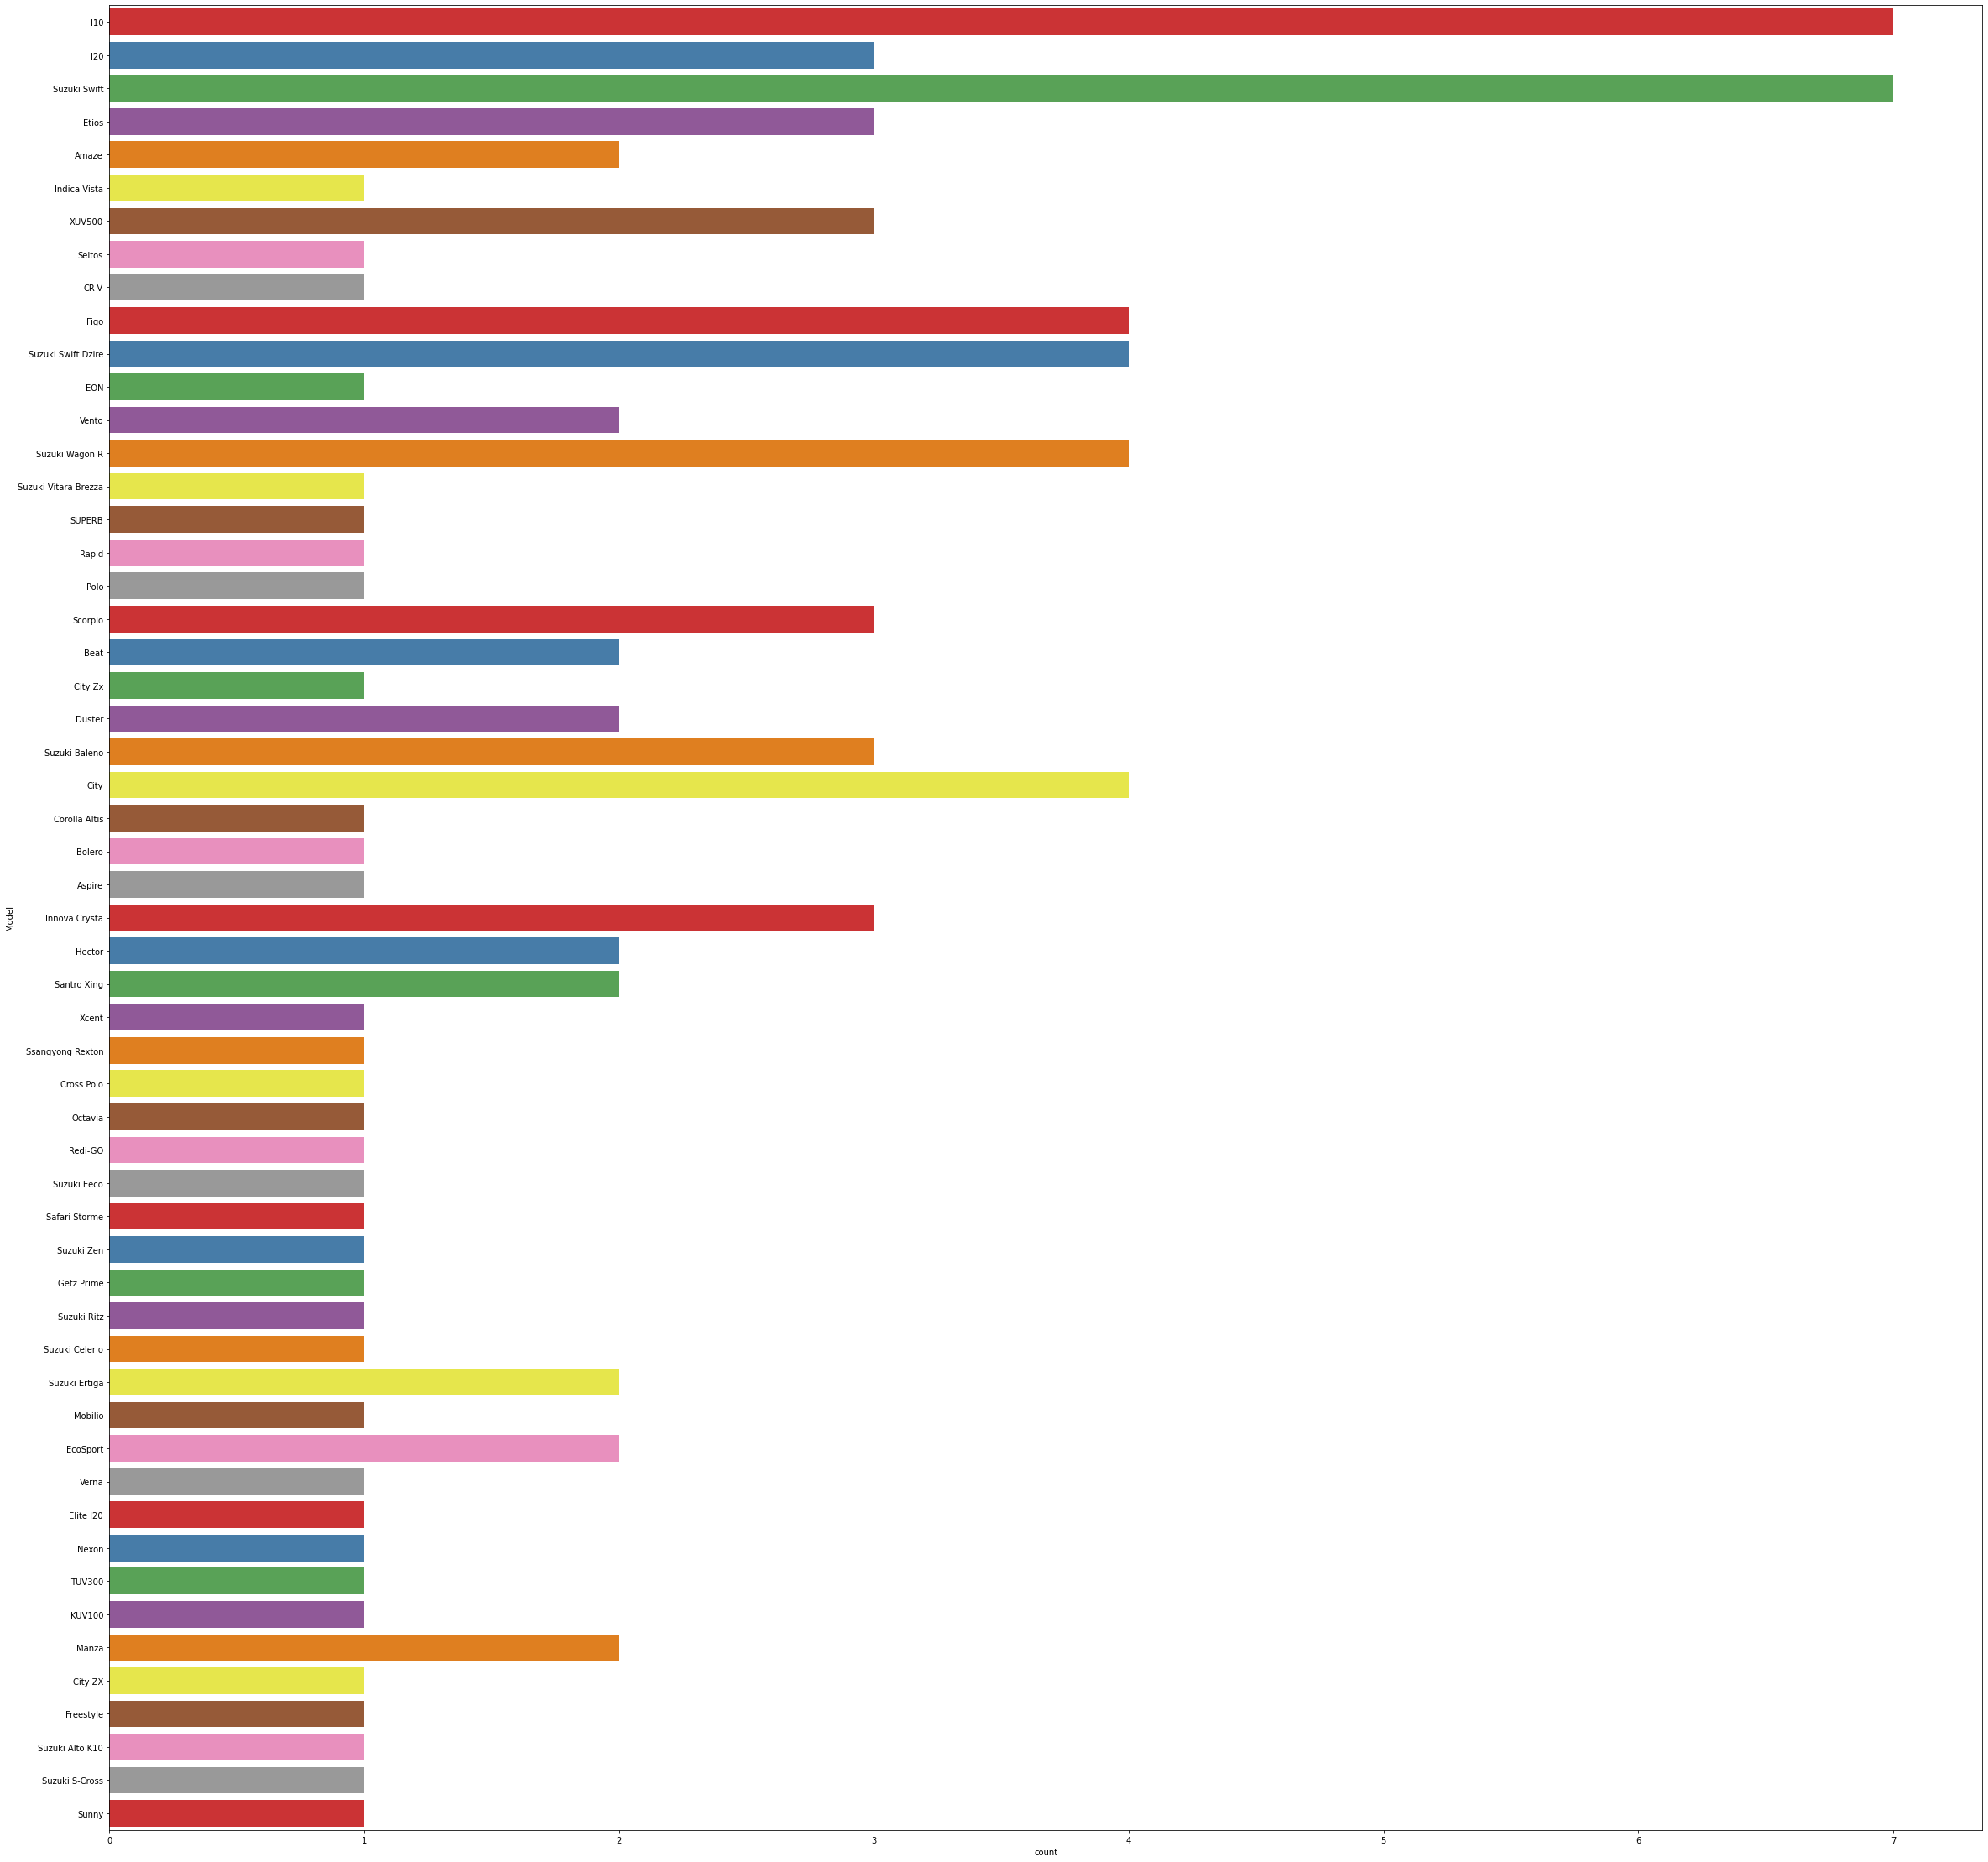

In [97]:
plt.figure(figsize=(40,40),facecolor='white')
sns.countplot(y=DF['Model'][0:100], palette="Set1")

In [98]:
DF['Variant'].value_counts()

Swift DZire VDi         129
Swift VDi                87
Magna 1.2                81
Swift VXi                77
Alto LXi                 67
                       ... 
4X4 EX DICOR 2.2 VTT      1
Dynamic 1.2               1
1.5 DV5 MT Ambiente       1
3.0 Limited Edition       1
eCS VX CR4                1
Name: Variant, Length: 1617, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Variant'>

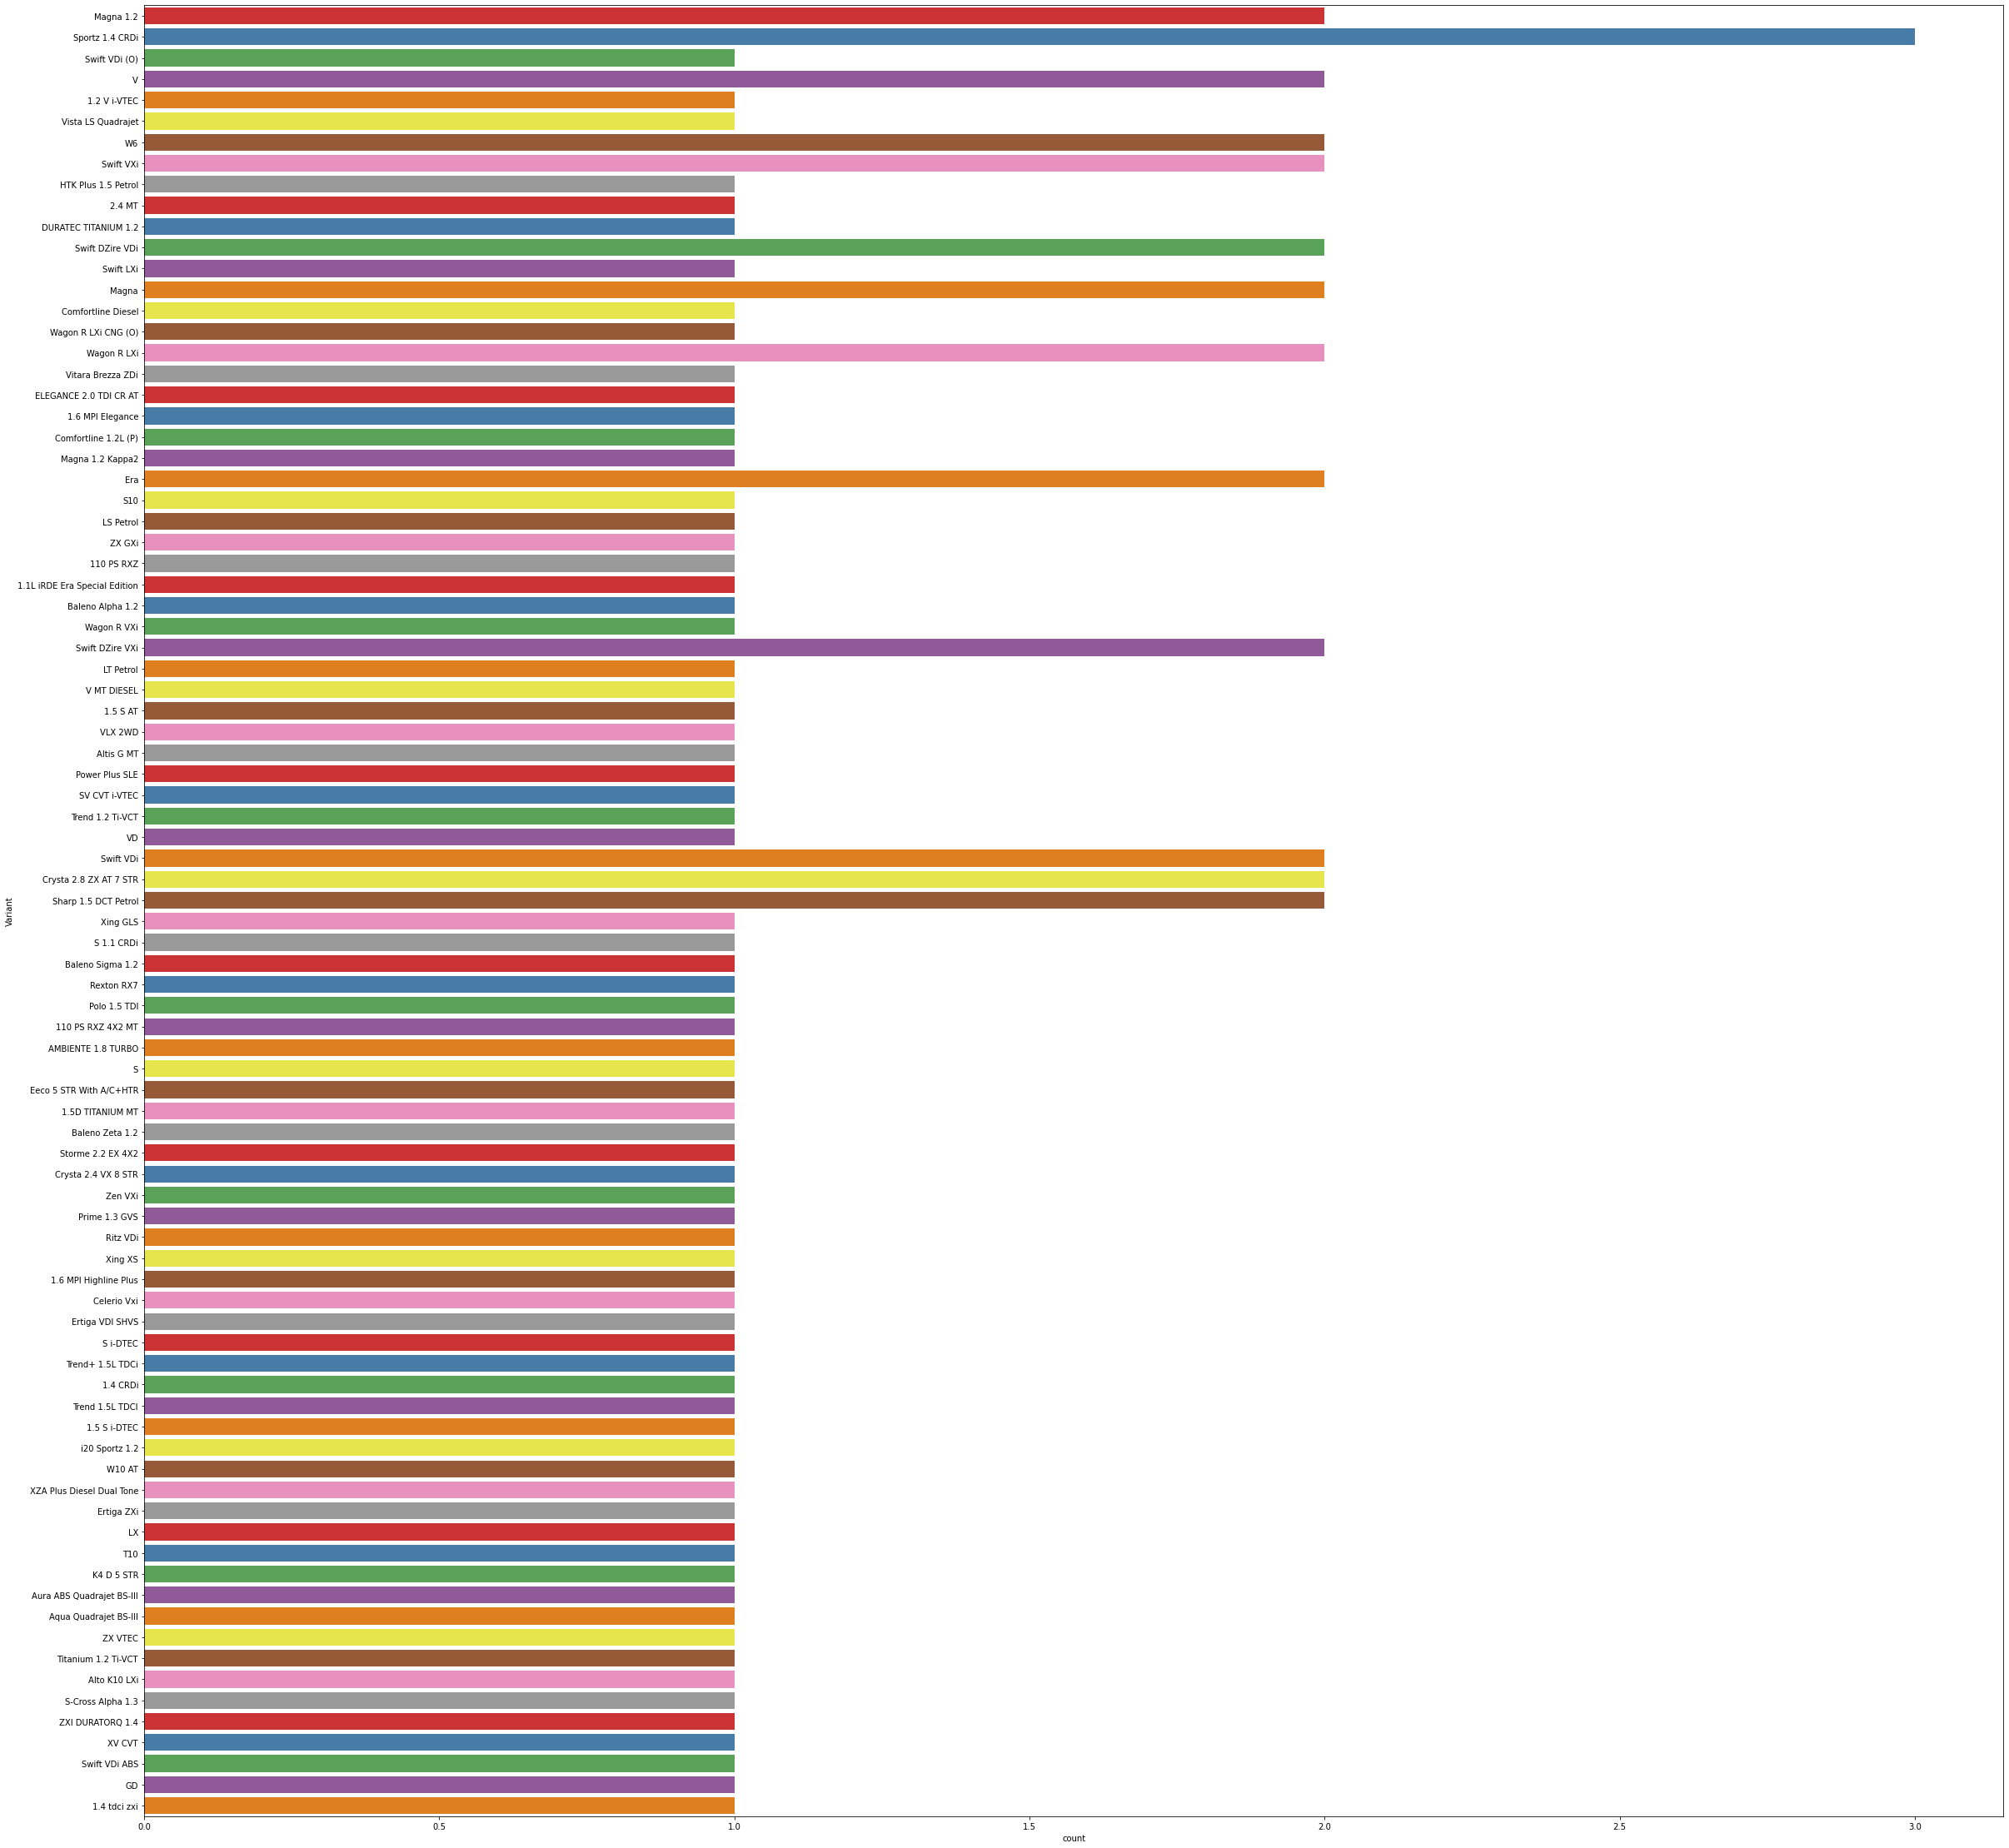

In [99]:
plt.figure(figsize=(40,40),facecolor='white')
sns.countplot(y=DF['Variant'][0:100], palette="Set1")

In [100]:
DF.dtypes[DF.dtypes != 'object'] #Identifying the Continuous non object type Columns

Year                       float64
Total Kilometers Driven    float64
Seating Capacity           float64
Mileage                    float64
Price                      float64
dtype: object

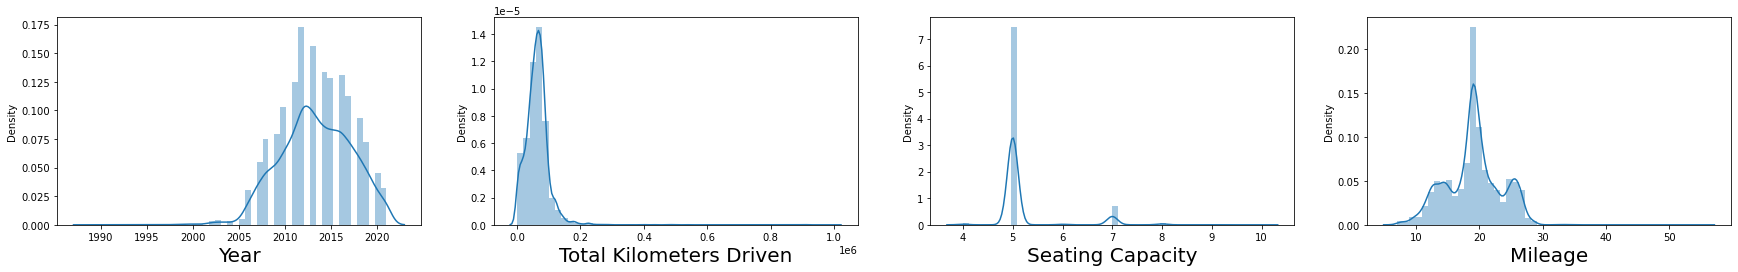

In [101]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
X = DF.drop(columns = 'Price')
for col in X[X.columns[X.dtypes != 'object']]:
    if plotnum<=34:
        plt.subplot(10,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Year and Mileage columns look normally distributed, while Total kilometers Driven and Seating Capacity are skewed

In [102]:
DF[DF.columns[DF.dtypes != 'object']].skew()

Year                      -0.204267
Total Kilometers Driven    7.225858
Seating Capacity           2.832887
Mileage                   -0.011169
Price                      3.965478
dtype: float64

### Checking for Outliers

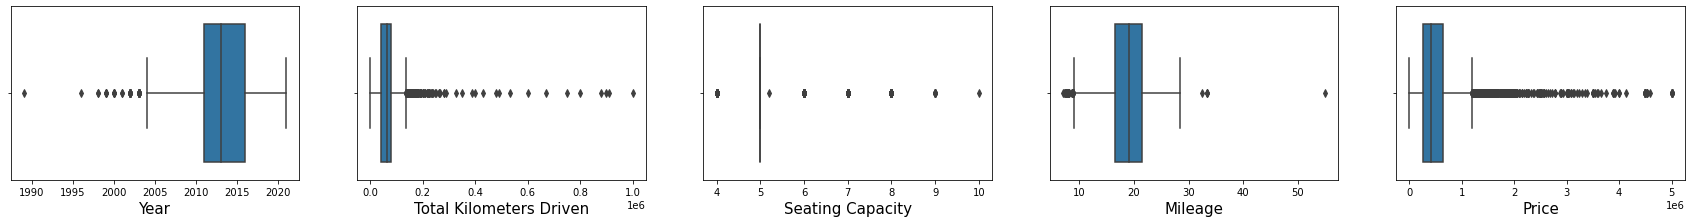

In [103]:
plt.figure(figsize=(30,30),facecolor='white')
plotnum=1
for col in DF[DF.columns[DF.dtypes != 'object']]:
    if plotnum<=34:
        plt.subplot(8,5,plotnum)
        sns.boxplot(DF[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

There are considerable outliers in the columns.

#### Removing Outliers using Z score Method

In [104]:
df2 =DF[DF.columns[DF.dtypes != 'object']].copy() #making a copy of the continuous data type columns with outliers.

In [105]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [106]:
df3.shape

(7125, 5)

In [107]:
df2.shape

(7395, 5)

##### Data loss %:

In [108]:
loss=(7483-7207)/7207 * 100
loss

3.8296101012904122

3.82% data loss is acceptable.

In [109]:
dropindx = DF.index.difference(df3.index)

In [110]:
dropindx

Int64Index([  47,   65,   91,  112,  135,  176,  204,  212,  220,  223,
            ...
            6964, 6973, 7058, 7067, 7152, 7161, 7246, 7255, 7340, 7349],
           dtype='int64', length=270)

In [111]:
DF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [112]:
DF.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

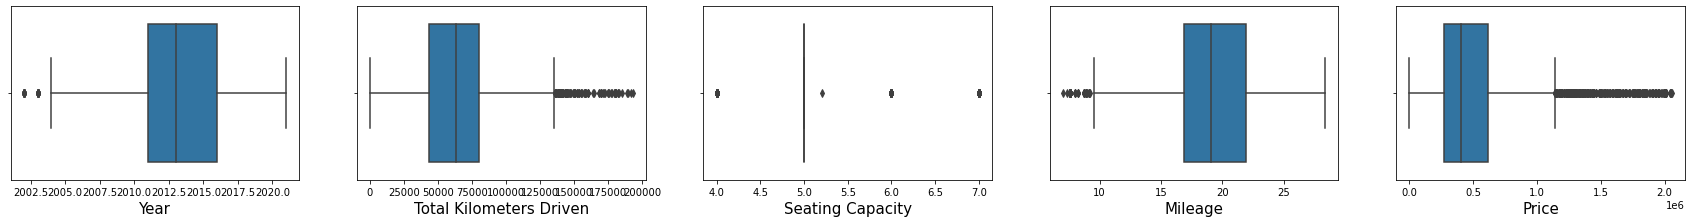

In [113]:
plt.figure(figsize=(30,30),facecolor='white')
plotnum=1
for col in DF[DF.columns[DF.dtypes != 'object']]:
    if plotnum<=34:
        plt.subplot(8,5,plotnum)
        sns.boxplot(DF[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

Considerable number of outliers has been removed

### Extracting Age data from Year Column to better understand its relationship with Target Column.

In [114]:
DF['Car Age'] = DF['Year'].apply(lambda y: 2021 - y)

In [115]:
DF

,Year,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price,Brand,Model,Variant,Car Age
0,2007.0,Hatchback,70000.0,Petrol,First Owner,Delhi,Manual,5.0,20.000000,102000.0,Hyundai,I10,Magna 1.2,14.0
1,2016.0,Hatchback,1200.0,Diesel,First Owner,Bangalore,Manual,5.0,18.600000,704000.0,Hyundai,I20,Sportz 1.4 CRDi,5.0
2,2016.0,Hatchback,79000.0,Diesel,First Owner,Jodhpur,Manual,5.0,25.200000,630000.0,Maruti,Suzuki Swift,Swift VDi (O),5.0
3,2011.0,Sedan,55000.0,Petrol,First Owner,Mumbai,Manual,5.0,17.570000,310000.0,Toyota,Etios,V,10.0
4,2019.0,Sedan,56236.0,Petrol,First Owner,Lucknow,Manual,5.0,19.500000,615000.0,Honda,Amaze,1.2 V i-VTEC,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7120,2011.0,Sedan,59123.0,Petrol,First Owner,bhatinda,Manual,5.0,19.044308,380000.0,Volkswagen,Vento,1.6L Highline,10.0
7121,2015.0,Sedan,35000.0,Petrol,First Owner,Delhi,Manual,5.0,15.230000,900000.0,Toyota,Corolla Altis,Altis 1.8 G,6.0
7122,2008.0,SUV,124758.0,Diesel,Fourth Owner,Calicut,Manual,5.0,11.120000,79999.0,Icml,Rhino Rx,Rx ROYALE CRDFI 8 STR BS IV,13.0
7123,2006.0,Sedan,121025.0,Petrol,First Owner,Bangalore,Manual,5.0,14.800000,250000.0,Honda,Civic,1.8 S MT,15.0


#### Dropping Year Column since it is no longer needed

In [116]:
DF.drop(columns = ['Year'],inplace=True)

In [117]:
DF

,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price,Brand,Model,Variant,Car Age
0,Hatchback,70000.0,Petrol,First Owner,Delhi,Manual,5.0,20.000000,102000.0,Hyundai,I10,Magna 1.2,14.0
1,Hatchback,1200.0,Diesel,First Owner,Bangalore,Manual,5.0,18.600000,704000.0,Hyundai,I20,Sportz 1.4 CRDi,5.0
2,Hatchback,79000.0,Diesel,First Owner,Jodhpur,Manual,5.0,25.200000,630000.0,Maruti,Suzuki Swift,Swift VDi (O),5.0
3,Sedan,55000.0,Petrol,First Owner,Mumbai,Manual,5.0,17.570000,310000.0,Toyota,Etios,V,10.0
4,Sedan,56236.0,Petrol,First Owner,Lucknow,Manual,5.0,19.500000,615000.0,Honda,Amaze,1.2 V i-VTEC,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7120,Sedan,59123.0,Petrol,First Owner,bhatinda,Manual,5.0,19.044308,380000.0,Volkswagen,Vento,1.6L Highline,10.0
7121,Sedan,35000.0,Petrol,First Owner,Delhi,Manual,5.0,15.230000,900000.0,Toyota,Corolla Altis,Altis 1.8 G,6.0
7122,SUV,124758.0,Diesel,Fourth Owner,Calicut,Manual,5.0,11.120000,79999.0,Icml,Rhino Rx,Rx ROYALE CRDFI 8 STR BS IV,13.0
7123,Sedan,121025.0,Petrol,First Owner,Bangalore,Manual,5.0,14.800000,250000.0,Honda,Civic,1.8 S MT,15.0


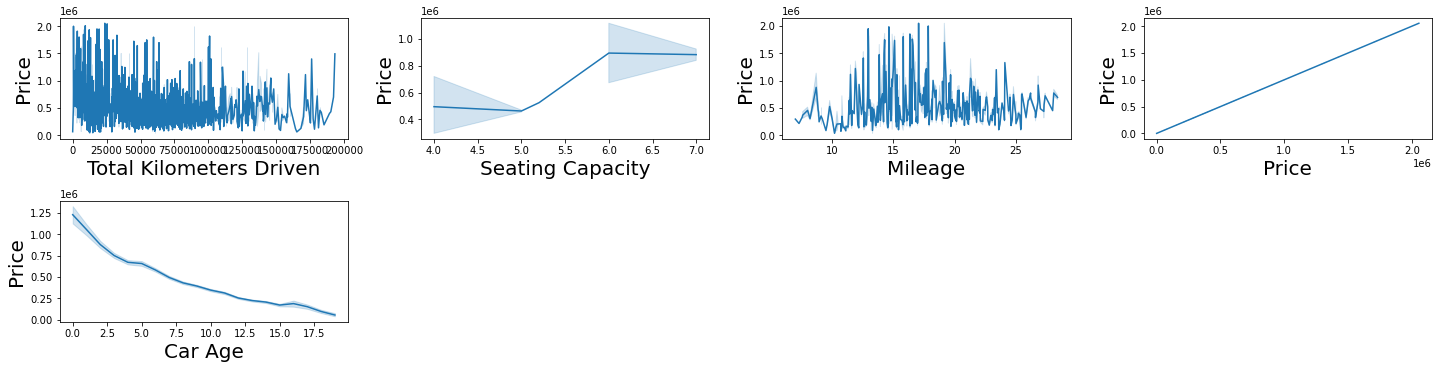

In [118]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = DF['Price']
DF.drop(columns=['Price'])
for col in DF[DF.columns[DF.dtypes != 'object']]:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sns.lineplot(DF[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnum+=1
plt.tight_layout()

Following Observations are made from graphs above:
    
There is a negative correlation between Total Kilometers Driven and Price

Cars with Mileage between 14 km/l and 19 km/l have the highest prices

There is a negative correlation between Car Age and Price

There is a positive correlation between Seating capacity and Price

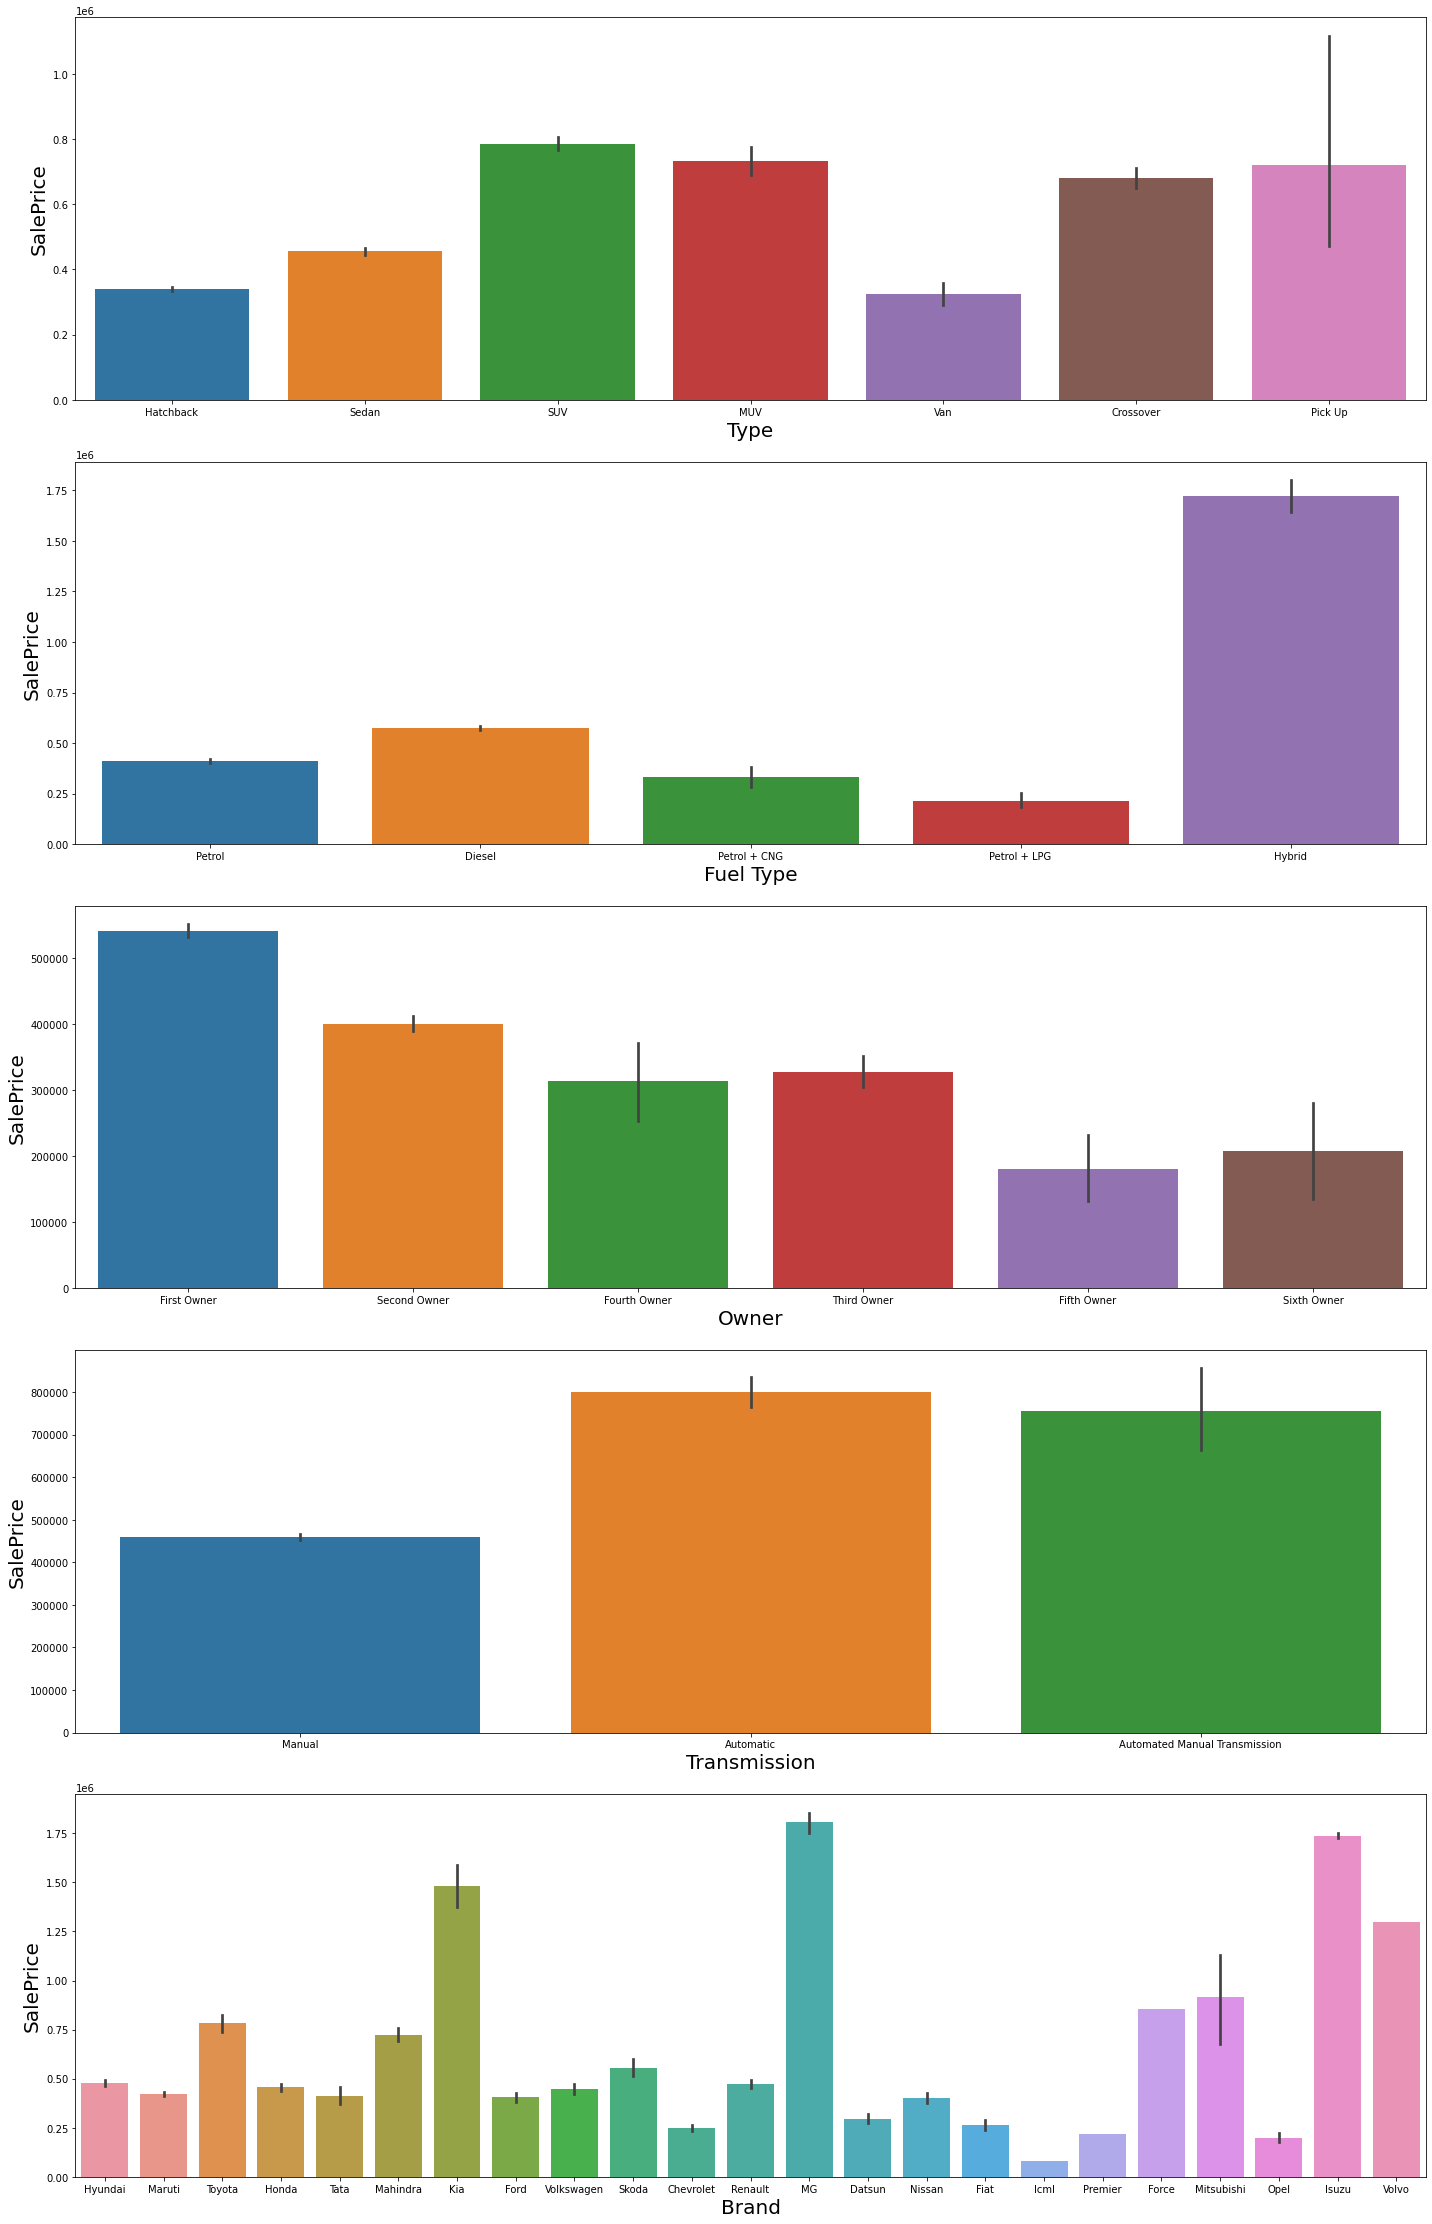

In [119]:
plt.figure(figsize=(20,31),facecolor='white')
plotnum=1
y = DF['Price']
for col in DF[['Type','Fuel Type','Owner','Transmission','Brand']]:
    if plotnum<=40:
        plt.subplot(5,1,plotnum)
        sns.barplot(DF[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

<AxesSubplot:xlabel='Price', ylabel='Location'>

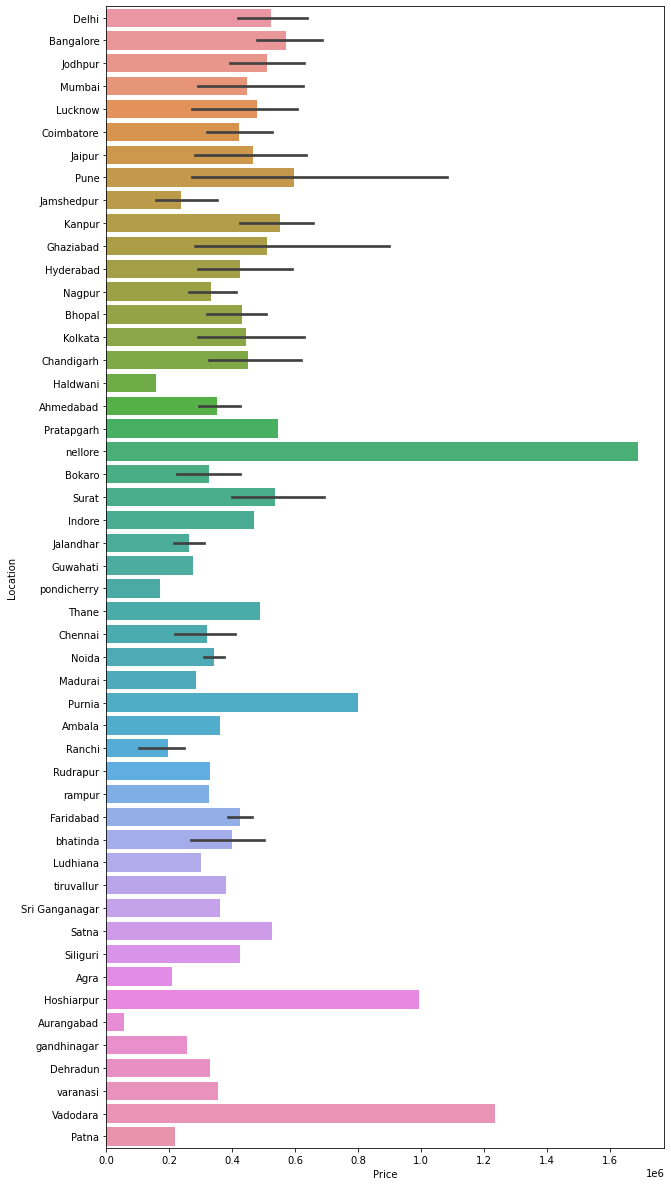

In [120]:
plt.figure(figsize=(10,21),facecolor='white')
sns.barplot(y=DF['Location'][0:240],x=DF['Price'])

<AxesSubplot:xlabel='Price', ylabel='Model'>

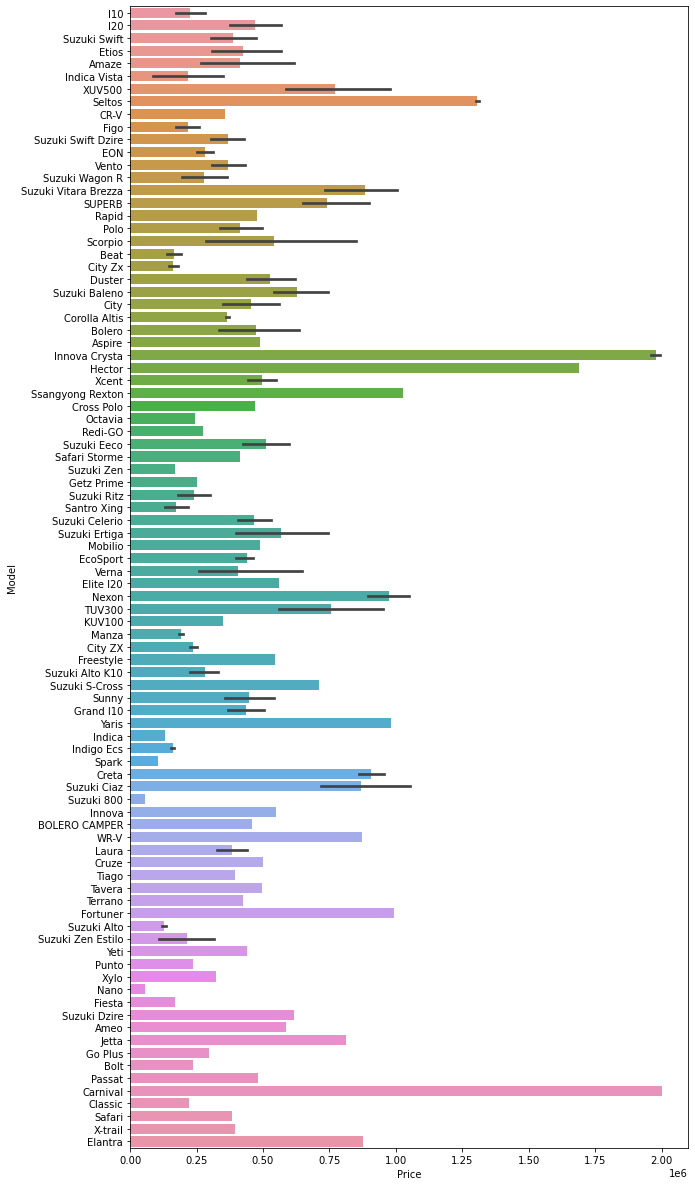

In [121]:
plt.figure(figsize=(10,21),facecolor='white')
sns.barplot(y=DF['Model'][0:240],x=DF['Price'])

Following Observations are made from graphs above:
    
SUV,MUV,Pickup and Crossover type Cars have the highest Prices

Hybrid Fuel Type Cars are the costliest

As the Number of previous owners increases, the price of used car decreases, so there is a negative correlation between ownership and Car Price

Automatic Cars have the highest prices

Kia,MG,Isuzu and Jeep are amongst the most expensive Car Brands while Maruti,Volkswagen,Chevrolet,Opel,Tata,Honda,Fiat and Ford are the most affordable Car Brands

Car Prices are highest in Lucknow,Rajkot,Bhubhaneshwar,Kohlapur,Ahmedabad and Haflong

Creta,Fortuner,Tucson,Seltos,Xuv500,Thar,Innova Crysta are amongst the most expensive car models, while Beat,Punto,Wagon R,Santro Xing,Alto,Fiesta are amongst the most affordable


<AxesSubplot:xlabel='Type', ylabel='Price'>

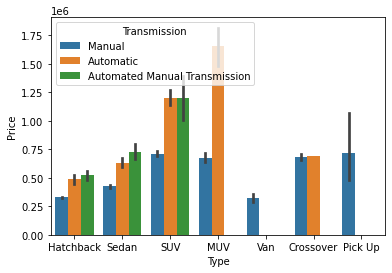

In [122]:
sns.barplot(DF['Type'],DF['Price'],hue = DF['Transmission'])

SUV and MUV cars with Automatic Transmission are the costliest

<AxesSubplot:xlabel='Fuel Type', ylabel='Price'>

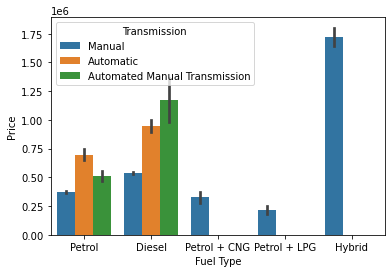

In [123]:
sns.barplot(DF['Fuel Type'],DF['Price'],hue = DF['Transmission'])

Hybrid Cars with Manual Transmission have the highest price followed by Diesel and Petrol cars with Automatic Transmission

<AxesSubplot:xlabel='Type', ylabel='Price'>

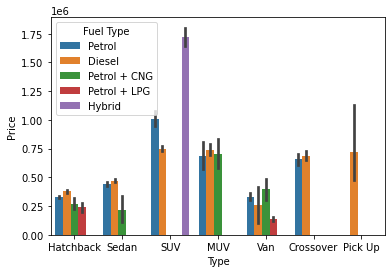

In [124]:
sns.barplot(DF['Type'],DF['Price'],hue = DF['Fuel Type'])

Hybrid Type Hatchback and SUV Cars are the most expensive

<AxesSubplot:xlabel='Brand', ylabel='Price'>

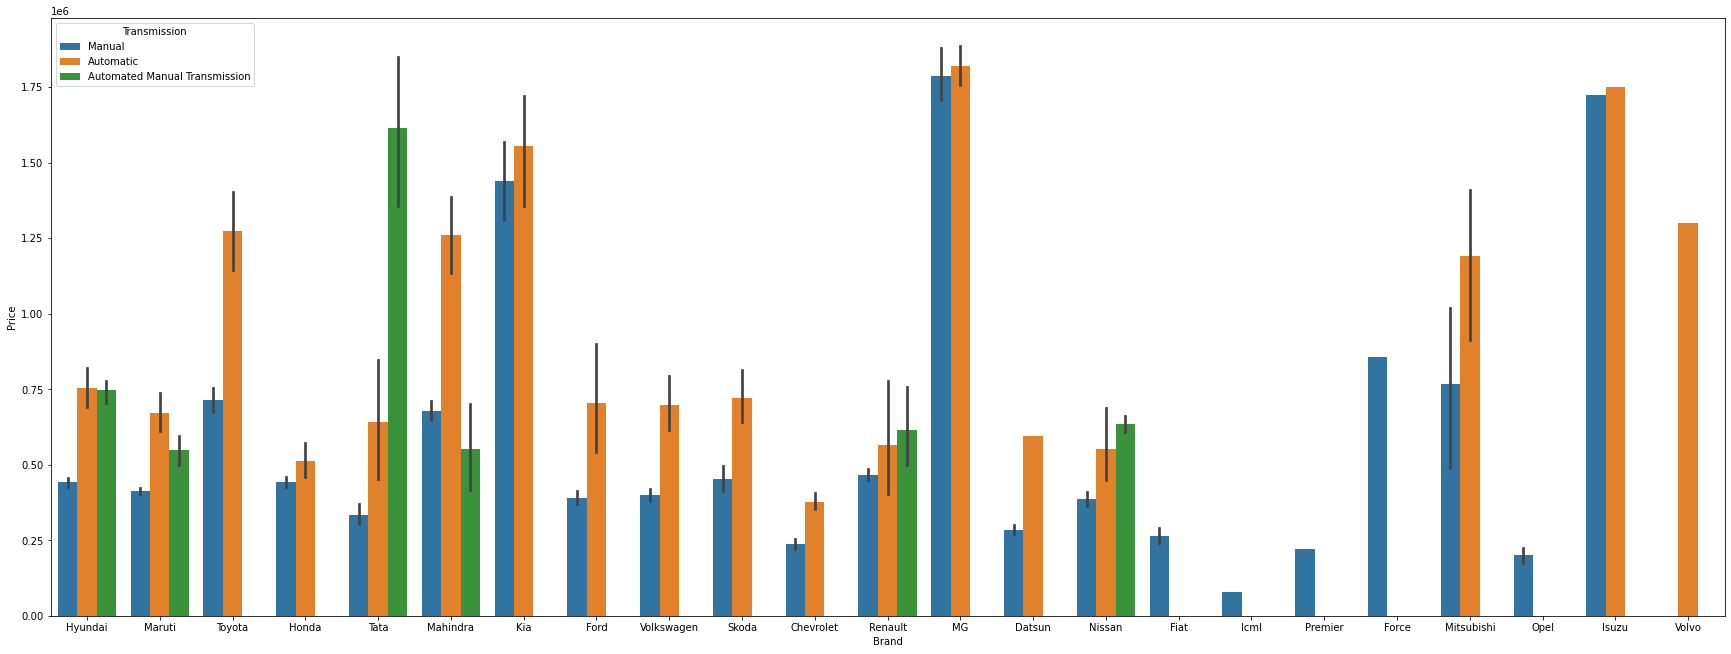

In [125]:
plt.figure(figsize=(30,11),facecolor='white')
sns.barplot(DF['Brand'],DF['Price'],hue = DF['Transmission'])

Automatic Transmission Variants are the most expensive cars of most car brands

<AxesSubplot:xlabel='Brand', ylabel='Price'>

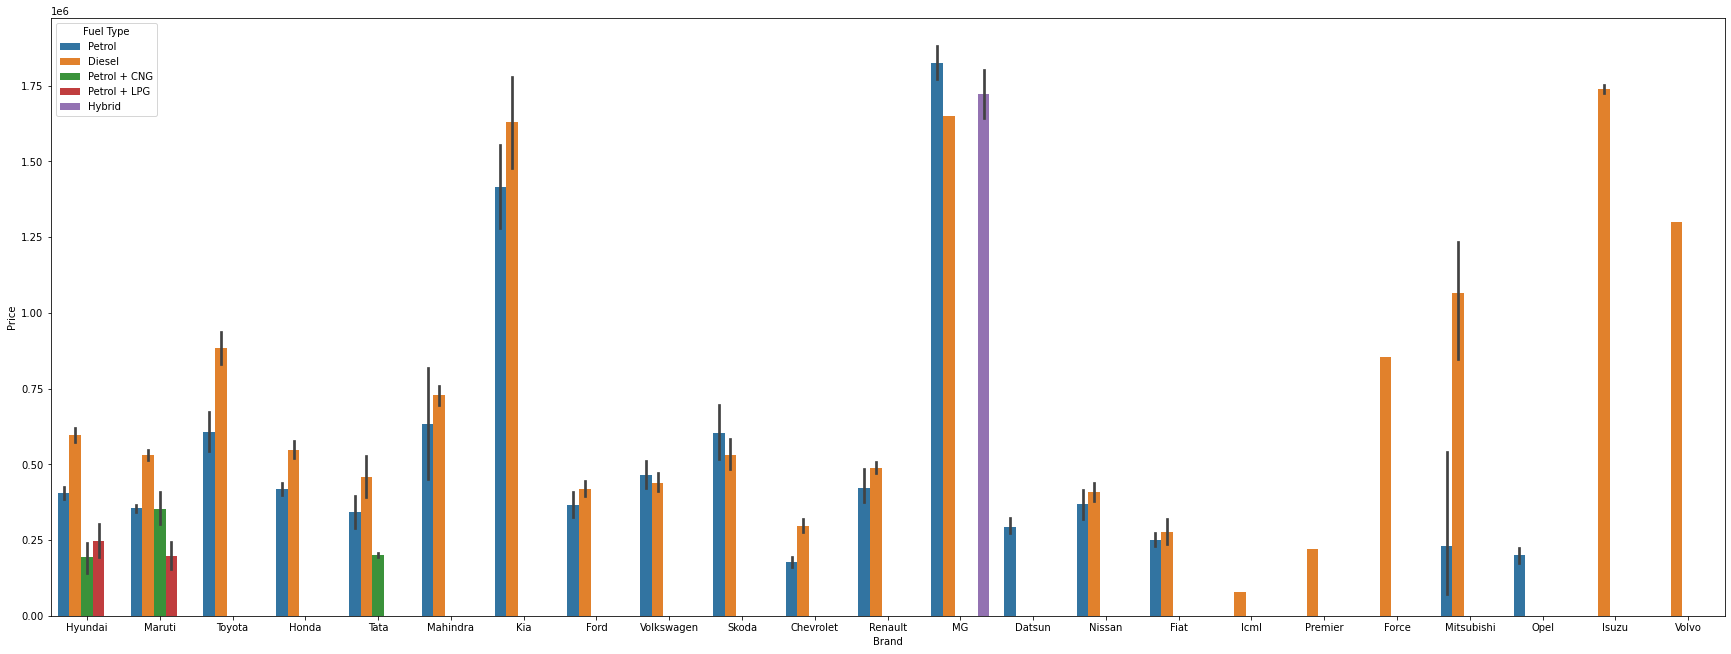

In [126]:
plt.figure(figsize=(30,11),facecolor='white')
sns.barplot(DF['Brand'],DF['Price'],hue = DF['Fuel Type'])

Diesel Variants,followed by Petrol Variants are the most expensive cars of most car brands

### Encoding Categorical Columns

In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
DF

,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price,Brand,Model,Variant,Car Age
0,Hatchback,70000.0,Petrol,First Owner,Delhi,Manual,5.0,20.000000,102000.0,Hyundai,I10,Magna 1.2,14.0
1,Hatchback,1200.0,Diesel,First Owner,Bangalore,Manual,5.0,18.600000,704000.0,Hyundai,I20,Sportz 1.4 CRDi,5.0
2,Hatchback,79000.0,Diesel,First Owner,Jodhpur,Manual,5.0,25.200000,630000.0,Maruti,Suzuki Swift,Swift VDi (O),5.0
3,Sedan,55000.0,Petrol,First Owner,Mumbai,Manual,5.0,17.570000,310000.0,Toyota,Etios,V,10.0
4,Sedan,56236.0,Petrol,First Owner,Lucknow,Manual,5.0,19.500000,615000.0,Honda,Amaze,1.2 V i-VTEC,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7120,Sedan,59123.0,Petrol,First Owner,bhatinda,Manual,5.0,19.044308,380000.0,Volkswagen,Vento,1.6L Highline,10.0
7121,Sedan,35000.0,Petrol,First Owner,Delhi,Manual,5.0,15.230000,900000.0,Toyota,Corolla Altis,Altis 1.8 G,6.0
7122,SUV,124758.0,Diesel,Fourth Owner,Calicut,Manual,5.0,11.120000,79999.0,Icml,Rhino Rx,Rx ROYALE CRDFI 8 STR BS IV,13.0
7123,Sedan,121025.0,Petrol,First Owner,Bangalore,Manual,5.0,14.800000,250000.0,Honda,Civic,1.8 S MT,15.0


In [129]:
DF['Owner'] = DF.Owner.map({'First Owner':1,'Second Owner':2,'Third Owner':3, 'Fourth Owner': 4, 'Fifth Owner': 5,'Sixth Owner': 6})

In [130]:
DF['Transmission'] = DF.Transmission.map({'Manual':1,'Automatic':2,'Automated Manual Transmission':3})

In [131]:
DF['Fuel Type'] = DF['Fuel Type'].map({'Diesel':1,'Petrol':2,'Petrol + CNG':3, 'Petrol + LPG': 4, 'Hybrid': 5})

In [132]:
DF['Type'] = DF.Type.map({'Hatchback':1,'Sedan':2,'SUV':3, 'MUV': 4, 'Crossover': 5,'Van': 6,'Pick Up': 7,'Road':8})

####  Encoding 'Location','Model' and 'Variant' using LabelEncoder()

In [133]:
labenc = LabelEncoder()

In [134]:
for col in DF[['Location','Model','Variant']]:
    DF[col] = labenc.fit_transform(DF[col])

In [135]:
DF

,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price,Brand,Model,Variant,Car Age
0,1,70000.0,2,1,33,1,5.0,20.000000,102000.0,Hyundai,72,874,14.0
1,1,1200.0,1,1,13,1,5.0,18.600000,704000.0,Hyundai,73,1109,5.0
2,1,79000.0,1,1,66,1,5.0,25.200000,630000.0,Maruti,173,1148,5.0
3,2,55000.0,2,1,90,1,5.0,17.570000,310000.0,Toyota,48,1227,10.0
4,2,56236.0,2,1,82,1,5.0,19.500000,615000.0,Honda,6,23,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7120,2,59123.0,2,1,161,1,5.0,19.044308,380000.0,Volkswagen,197,153,10.0
7121,2,35000.0,2,1,33,1,5.0,15.230000,900000.0,Toyota,33,348,6.0
7122,3,124758.0,1,4,26,1,5.0,11.120000,79999.0,Icml,130,980,13.0
7123,2,121025.0,2,1,13,1,5.0,14.800000,250000.0,Honda,30,158,15.0


####  Encoding 'Brand' using get_dummies()

In [136]:
dumm = pd.get_dummies(DF['Brand']) 

In [137]:
dumm

,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,Icml,Isuzu,Kia,...,Mitsubishi,Nissan,Opel,Premier,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7122,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7123,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
DF = DF.join(dumm)

In [139]:
DF.drop(columns=['Brand'],inplace=True)

In [140]:
DF

,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price,Model,...,Mitsubishi,Nissan,Opel,Premier,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,1,70000.0,2,1,33,1,5.0,20.000000,102000.0,72,...,0,0,0,0,0,0,0,0,0,0
1,1,1200.0,1,1,13,1,5.0,18.600000,704000.0,73,...,0,0,0,0,0,0,0,0,0,0
2,1,79000.0,1,1,66,1,5.0,25.200000,630000.0,173,...,0,0,0,0,0,0,0,0,0,0
3,2,55000.0,2,1,90,1,5.0,17.570000,310000.0,48,...,0,0,0,0,0,0,0,1,0,0
4,2,56236.0,2,1,82,1,5.0,19.500000,615000.0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7120,2,59123.0,2,1,161,1,5.0,19.044308,380000.0,197,...,0,0,0,0,0,0,0,0,1,0
7121,2,35000.0,2,1,33,1,5.0,15.230000,900000.0,33,...,0,0,0,0,0,0,0,1,0,0
7122,3,124758.0,1,4,26,1,5.0,11.120000,79999.0,130,...,0,0,0,0,0,0,0,0,0,0
7123,2,121025.0,2,1,13,1,5.0,14.800000,250000.0,30,...,0,0,0,0,0,0,0,0,0,0


### Finding Correlation between Feature and Target columns

In [141]:
d_corr =DF.corr()

In [142]:
d_corr

,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price,Model,...,Mitsubishi,Nissan,Opel,Premier,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
Type,1.000000,0.109562,-0.341887,-0.001678,-0.032295,0.022456,0.391359,-0.205640,0.427197,0.053012,...,0.038704,0.013729,-0.015894,0.011372,0.118529,-0.000544,0.009756,0.235773,-0.077454,0.011372
Total Kilometers Driven,0.109562,1.000000,-0.237128,0.314640,0.056452,-0.106221,0.010162,-0.142051,-0.248727,-0.054186,...,0.029347,0.038188,-0.002282,-0.010664,0.008580,-0.015890,-0.022003,0.179227,0.049802,0.004936
Fuel Type,-0.341887,-0.237128,1.000000,0.017414,-0.009845,0.064115,-0.211114,-0.254351,-0.232967,-0.043219,...,-0.029264,-0.074248,0.015987,-0.011031,-0.096925,-0.043830,-0.043087,-0.070680,-0.061642,-0.011031
Owner,-0.001678,0.314640,0.017414,1.000000,-0.000772,0.000245,-0.049518,-0.126265,-0.209264,-0.033990,...,0.008575,-0.003789,0.017111,-0.006830,-0.031524,-0.008277,0.003154,0.018818,0.031584,-0.006830
Location,-0.032295,0.056452,-0.009845,-0.000772,1.000000,-0.046808,0.001215,0.051915,-0.133736,0.017291,...,-0.025027,0.031151,-0.017847,0.037471,0.001211,-0.052719,-0.003293,-0.040040,0.039529,-0.007610
Transmission,0.022456,-0.106221,0.064115,0.000245,-0.046808,1.000000,0.033688,-0.116415,0.288197,-0.019057,...,0.031229,-0.010831,-0.005542,-0.003918,-0.013826,0.130367,0.011202,0.000644,0.023674,0.028620
Seating Capacity,0.391359,0.010162,-0.211114,-0.049518,0.001215,0.033688,1.000000,-0.155353,0.322771,0.058952,...,-0.002429,-0.037110,-0.004544,-0.003213,-0.029516,-0.048400,0.064494,0.102695,-0.057929,0.041398
Mileage,-0.205640,-0.142051,-0.254351,-0.126265,0.051915,-0.116415,-0.155353,1.000000,-0.078655,0.167441,...,-0.080969,0.051973,-0.000356,-0.000252,0.054745,-0.096492,-0.047152,-0.256531,-0.009781,-0.005391
Price,0.427197,-0.248727,-0.232967,-0.209264,-0.133736,0.288197,0.322771,-0.078655,1.000000,0.027340,...,0.060960,-0.038594,-0.014628,-0.009643,-0.012215,0.032158,-0.051859,0.234490,-0.030346,0.028156
Model,0.053012,-0.054186,-0.043219,-0.033990,0.017291,-0.019057,0.058952,0.167441,0.027340,1.000000,...,-0.000554,0.086211,-0.019894,0.003995,-0.149281,0.032685,0.007119,-0.209852,0.092011,0.017960


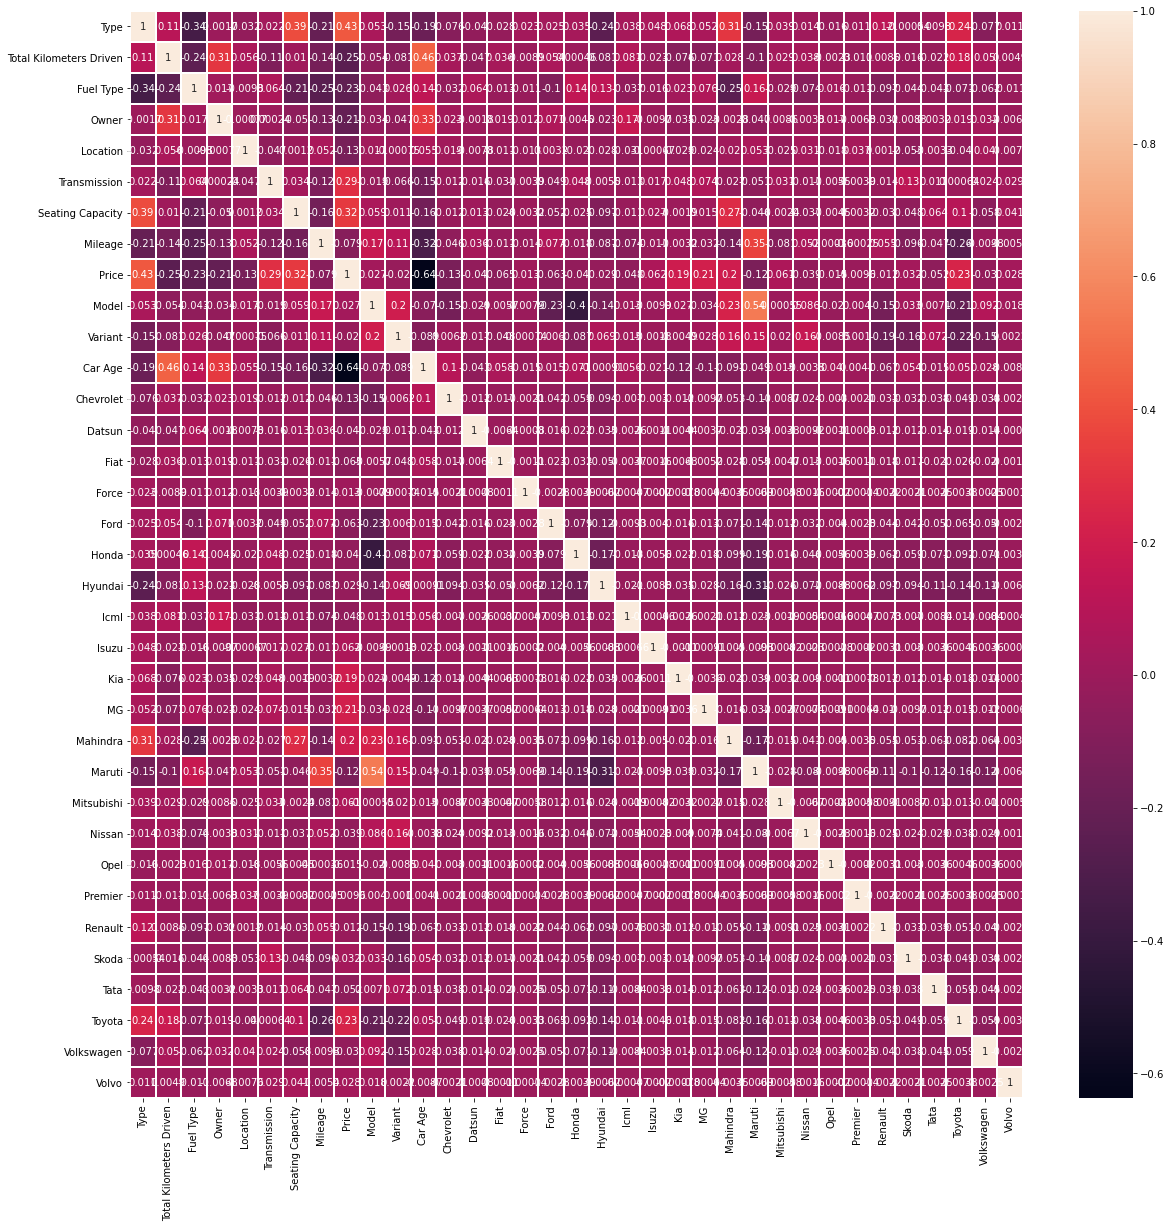

In [143]:
plt.figure(figsize=(20,20))
sns.heatmap(d_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

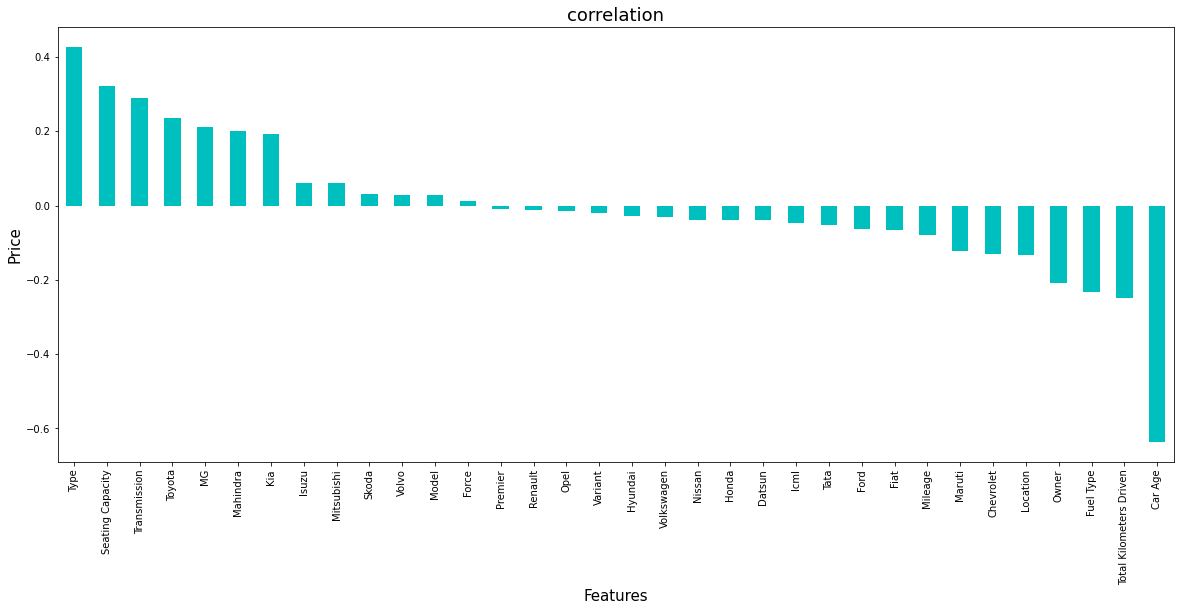

In [144]:
plt.figure(figsize = (20,8))
DF.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

Type, Seating Capacity have the strongest positive correlation with Price while Car Age,Total Kilometers Driven,Owner and Fuel Type have the strongest negative correlation with Price.

### Feature Selection

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
X = DF.drop(columns = ['Price'])
y = DF['Price']

In [147]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
vif = pd.DataFrame()

In [150]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [151]:
vif

,Features,vif
0,Type,1.820665
1,Total Kilometers Driven,1.567712
2,Fuel Type,1.771562
3,Owner,1.211409
4,Location,1.026876
5,Transmission,1.103882
6,Seating Capacity,1.300318
7,Mileage,1.979285
8,Model,2.457412
9,Variant,1.309299


There is no Multicollinearity among the columns

### Selecting Kbest Features

In [152]:
from sklearn.feature_selection import SelectKBest, f_classif

In [153]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [154]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(75,'Score'))

                    Feature      Score
18                     Icml        inf
21                       MG  17.515533
20                      Kia   8.796942
10                  Car Age   8.188047
19                    Isuzu   4.524224
24               Mitsubishi   4.006435
6          Seating Capacity   3.116364
0                      Type   2.627423
12                   Datsun   2.474662
1   Total Kilometers Driven   2.426541
22                 Mahindra   2.402070
5              Transmission   2.279827
30                     Tata   2.201584
2                 Fuel Type   2.136821
31                   Toyota   2.091291
29                    Skoda   1.894743
4                  Location   1.813352
3                     Owner   1.719472
7                   Mileage   1.699902
8                     Model   1.529364
9                   Variant   1.495503
17                  Hyundai   1.401982
23                   Maruti   1.347607
16                    Honda   1.256913
28                  Renau

#### Selecting best features based on their scores:

In [157]:
x_best = X.drop(columns=['Opel','Premier']).copy()

In [158]:
scaled_x_best = scaler.fit_transform(x_best)

### This is a Regression Problem since Target/ Label column ('Price') has Continuous type of Data.


## Regression Model Building

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
from sklearn.metrics import r2_score

#### Finding the Best Random State

In [161]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9148642481939413 on random_state: 25


In [162]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state =90)

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [164]:
from sklearn.metrics import r2_score,mean_squared_error

In [165]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()
KNN = KNeighborsRegressor()

### Training the Models

In [166]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)
KNN.fit(x_train,y_train)

KNeighborsRegressor()

All models have been trained.

### Ridge Regression Model

In [167]:
y_r_pred = r.predict(x_test)

####  R2 Score

In [168]:
r2_score(y_test,y_r_pred)

0.6873833278420209

#### Mean Squared Error 

In [169]:
mean_squared_error(y_test,y_r_pred)

35483244365.20185

#### Root Mean Squared Error

In [170]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

188369.96672824956

###  Random Forest Regression Model

In [171]:
y_rf_pred = rf.predict(x_test)

#### R2 Score

In [172]:
r2_score(y_test,y_rf_pred)

0.9024028047065531

#### Mean Squared Error

In [173]:
mean_squared_error(y_test,y_rf_pred)

11077672556.777988

#### Root Mean Squared Error

In [174]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

105250.52283375122

### XGB Regression Model 

In [175]:
y_xg_pred = xg.predict(x_test)

####  R2 Score

In [176]:
r2_score(y_test,y_xg_pred)

0.9265638965941891

#### Mean Squared Error

In [177]:
mean_squared_error(y_test,y_xg_pred)

8335291858.8418045

#### Root Mean Squared Error

In [178]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

91297.81957331623

### Support Vector Regression Model

In [179]:
y_svr_pred = SV.predict(x_test)

####  R2 Score

In [180]:
r2_score(y_test,y_svr_pred)

-0.059149152782824066

#### Mean Squared Error

In [181]:
mean_squared_error(y_test,y_svr_pred)

120217670887.35939

#### Root Mean Squared Error

In [182]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

346724.20003132086

###  Decision Tree Regression Model

In [183]:
y_dt_pred = dt.predict(x_test)

####  R2 Score

In [184]:
r2_score(y_test,y_dt_pred)

0.8121862498929346

#### Mean Squared Error

In [185]:
mean_squared_error(y_test,y_dt_pred)

21317612858.556118

#### Root Mean Squared Error

In [186]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

146005.52338372724

###  KNN Regression Model

In [187]:
y_knn_pred = KNN.predict(x_test)

####  R2 Score

In [188]:
r2_score(y_test,y_knn_pred)

0.8345252629986255

#### Mean Squared Error

In [189]:
mean_squared_error(y_test,y_knn_pred)

18782045400.061413

#### Root Mean Squared Error

In [190]:
np.sqrt(mean_squared_error(y_test,y_knn_pred))

137047.60267900134

### Model Cross Validation

In [191]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

#### Ridge Regression

In [192]:
cross_val_score(r,scaled_x_best,y,cv=5).mean()

0.6741070777390178

#### Random Forest Regression

In [193]:
cross_val_score(rf,scaled_x_best,y,cv=5).mean()

0.8840513471483897

#### XGB Regression

In [194]:
cross_val_score(xg,scaled_x_best,y,cv=5).mean()

0.9064086387186607

#### SV Regression

In [195]:
cross_val_score(SV,scaled_x_best,y,cv=5).mean()

-0.06883213125993533

#### Decision Tree Regression

In [196]:
cross_val_score(dt,scaled_x_best,y,cv=5).mean()

0.7806441732372326

#### KNN Regression

In [197]:
cross_val_score(KNN,scaled_x_best,y,cv=5).mean()

0.7772820879516277

### Based on comparing Accuracy Score results with Cross Validation results, it is determined that XGB Regressor is the best model. It also has the lowest Root Mean Squared Error score

### Hyper Parameter Tuning

In [198]:
from sklearn.model_selection import GridSearchCV

#### XGB Regressor

In [199]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [200]:
GridCV = GridSearchCV(XGBRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [201]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [202]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'max_depth': 10,
 'min_child_weight': 3,
 'subsample': 0.5}

In [203]:
Best_mod = XGBRegressor(booster = 'gbtree',eta = 0.1, max_depth= 10, min_child_weight = 3,subsample = 0.5)
Best_mod.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [204]:
xgbpred = Best_mod.predict(x_test)

acc = r2_score(y_test,xgbpred)
print(acc*100)

92.0358182963799


### XGB Regressor has an accuracy of 92.03%

#### Saving The Model

In [205]:
import joblib
joblib.dump(Best_mod,"BestModelCar.pkl")

['BestModelCar.pkl']

#### Loading The Model

In [206]:
mod=joblib.load("BestModelCar.pkl")

In [207]:
print(mod.predict(scaled_x_best))

[103596.55 714833.1  549298.7  ...  78756.77 248574.86 255186.48]


In [208]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_x_best), 'Actual Values': y[0:7207]})
Prediction_accuracy

,Predictions,Actual Values
0,103596.546875,102000.0
1,714833.125000,704000.0
2,549298.687500,630000.0
3,306850.531250,310000.0
4,621590.875000,615000.0
...,...,...
7120,377600.906250,380000.0
7121,901265.250000,900000.0
7122,78756.773438,79999.0
7123,248574.859375,250000.0
